# Figure 2: comparison of algorithms

In [1]:
##### Load data from table 
import pandas as pd
import numpy as np
import warnings
import re
warnings.filterwarnings('ignore')

all_dicts = {}
envs = ['Env0 (default params)', 'Env1 (Spatial features)', 'Env2 (Temporal features)'] #fixed names of environments
table = pd.read_excel('data/Kur features table.xlsx', sheet_name=3, index_col=0, header=[0, 1, 2])

for i, env in enumerate(envs):
    t = table[env].drop('Notes', axis=1).iloc[:15] #adjust number of interesting rows if more agents will be added
    t = t.replace('???', 'nan')
    t = t.replace('D', 'nan')
    t = t.replace('*', 'nan')
    t = t.replace('', 'nan')
    t = t.replace(r'\s+', r' ', regex=True)

    t = t.astype(str)

    output_dict = {
        'env': [],
        'model': [],
        'R1_bbpow_mean': [],
        'R1_bbpow_sd': [],
        'R1_energy_mean': [],
        'R1_energy_sd': [],
        
        'R2_bbpow_mean': [],
        'R2_bbpow_sd': [],
        'R2_energy_mean': [],
        'R2_energy_sd': [],
        
        'R3_bbpow_mean': [],
        'R3_bbpow_sd': [],
        'R3_energy_mean': [],
        'R3_energy_sd': []
    }

    output_dict['env'] = [0] * len(t.index.to_list())
    output_dict['model'] = t.index.to_list()



    # Parse each row of the table
    for c, Rtype in zip(t.columns, ['R1', 'R1', 'R2', 'R2', 'R3', 'R3']):
        print(c)
        col = t[c].copy()
        dat = pd.DataFrame([v.split(' ') for v in col.values])
        dat[0] = dat[0].astype(float)
        dat[1] = dat[1].str.replace('(', '').str.replace(')', '').astype(float)

        if c[1] == 'bbpow':
            output_dict[f'{Rtype}_bbpow_mean'] = dat[0].values.tolist() 
            output_dict[f'{Rtype}_bbpow_sd'] = dat[1].values.tolist()
        else:
            output_dict[f'{Rtype}_energy_mean'] = dat[0].values.tolist() 
            output_dict[f'{Rtype}_energy_sd'] = dat[1].values.tolist()

    all_dicts[env] = output_dict    

('reward_bbpow_action (#1)', 'bbpow')
('reward_bbpow_action (#1)', 'energy')
('reward_temp_const_lfp_betafilt_action (#2)', 'bbpow')
('reward_temp_const_lfp_betafilt_action (#2)', 'energy')
('reward_bbpow_threth_action (#3) (old)', 'bbpow')
('reward_bbpow_threth_action (#3) (old)', 'energy')
('reward_bbpow_action (#1)', 'bbpow')
('reward_bbpow_action (#1)', 'energy')
('reward_temp_const_lfp_betafilt_action (#2)', 'bbpow')
('reward_temp_const_lfp_betafilt_action (#2)', 'energy')
('reward_bbpow_threth_action (#3) (new)', 'bbpow')
('reward_bbpow_threth_action (#3) (new)', 'energy')
('reward_bbpow_action (#1)', 'bbpow')
('reward_bbpow_action (#1)', 'energy')
('reward_temp_const_lfp_betafilt_action (#2)', 'bbpow')
('reward_temp_const_lfp_betafilt_action (#2)', 'energy')
('reward_bbpow_threth_action (#3) (new)', 'bbpow')
('reward_bbpow_threth_action (#3) (new)', 'energy')


In [2]:
env0 = pd.DataFrame(all_dicts['Env0 (default params)'])
env1 = pd.DataFrame(all_dicts['Env1 (Spatial features)'])
env2 = pd.DataFrame(all_dicts['Env2 (Temporal features)'])

In [3]:
env0 = env0.drop([1, 8, 9, 12, 14], axis=0)
env1 = env1.drop([1, 8, 9, 12, 14], axis=0)
env2 = env2.drop([1, 8, 9, 12, 14], axis=0)
env0

,env,model,R1_bbpow_mean,R1_bbpow_sd,R1_energy_mean,R1_energy_sd,R2_bbpow_mean,R2_bbpow_sd,R2_energy_mean,R2_energy_sd,R3_bbpow_mean,R3_bbpow_sd,R3_energy_mean,R3_energy_sd
0,0,no DBS,11.830,3.200,0.0,NaN,11.830,3.200,0.00,NaN,11.83,3.200,0.0000,NaN
2,0,HF-DBS (lim),2.340,0.230,5555.0,0.000,2.340,0.230,5555.00,0.000,2.34,0.230,5555.0000,0.0000
3,0,PPO,7.849,1.779,5273.8,23.000,7.998,3.790,2152.92,50.600,10.10,2.420,269.5800,24.9000
4,0,SAC,3.239,0.707,4876.8,26.450,10.310,5.543,461.10,87.068,10.10,3.690,8.5386,0.0227
5,0,DDPG,3.180,0.580,5548.8,1.571,10.080,5.640,484.90,132.350,10.22,3.576,0.4360,0.0000
6,0,PI,2.200,0.200,5555.0,0.000,2.200,0.200,5555.00,0.000,2.22,0.200,5555.0000,0.0000
7,0,PID,2.200,0.200,5555.0,0.000,2.230,0.200,5555.00,0.000,2.23,0.200,5555.0000,0.0000
10,0,Random policy (lim),10.150,2.290,2775.0,19.000,10.150,2.290,2775.00,19.000,10.15,2.290,2775.0000,19.0000
11,0,IQL,3.600,0.690,5512.0,26.000,8.970,5.000,1880.00,320.000,11.90,2.780,149.0000,48.0000
13,0,CQL-SAC(offline data),11.500,3.200,390.0,9.700,12.000,2.600,423.00,38.000,11.50,4.800,398.0000,45.0000


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from adjustText import adjust_text  # third-party library for label collision avoidance
import pandas as pd
import numpy as np

def plot_scatter_with_whiskers(data, 
                               pd_env_bbpow, 
                               hfdbs_energy, 
                               show_whiskers=True, 
                               annotate_models=False,
                               title='Results',
                               grid_alpha=0.3,
                               use_adjust_text=False):
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 5))
    texts = []  # we'll store the annotation references here

    # Create a rectangle patch for control zones optimality
    opt_control_zone = patches.Rectangle((0, 0), 40, 40, 
                             color='cornflowerblue', alpha=0.15)
    greedy_control_zone = patches.Rectangle((0, 40), 40, 60, 
                             color='navajowhite', alpha=0.25)
    poor_control_zone = patches.Rectangle((40, 0), 60, 100, 
                             color='lightcoral', alpha=0.25)
    # Add the rectangle to the plot
    ax.add_patch(opt_control_zone)
    ax.add_patch(greedy_control_zone)
    ax.add_patch(poor_control_zone)
    ax.annotate("Optimal\n control",
                (20, 30), 
                ha='center', va='center',
                color='cornflowerblue', fontsize=11)
    ax.annotate("Greedy\n control",
                (20, 90), 
                ha='center', va='center',
                color='orange', fontsize=11)
    ax.annotate("Poor\n control",
                (70, 60), 
                ha='center', va='center',
                color='indianred', fontsize=11)



    for env_name, models in data.items():
        for model_name, metrics in models.items():
            x_val = (metrics['reward_bbpow'] / pd_env_bbpow) * 100
            y_val = (metrics['energy_bbpow'] / hfdbs_energy) * 100
            if (np.isfinite(x_val) & np.isfinite(y_val)):
                if show_whiskers:
                    x_err = (metrics['reward_bbpow_sd'] / pd_env_bbpow) * 100
                    y_err = (metrics['energy_bbpow_sd'] / hfdbs_energy) * 100
                    ax.errorbar(x_val, y_val, xerr=x_err, yerr=y_err, fmt='o', lw=0.7)
                else:
                    ax.scatter(x_val, y_val)

                if annotate_models:
                    # Create the annotation and store its reference
                    text = ax.annotate(f"{model_name}",
                                    (x_val, y_val),
                                    #textcoords="offset points",
                                    #    ha='center', 
                                    #    va='center',
                                    #xytext=(5,5),
                                    #    ha='left'
                                    )
                    texts.append(text)
    # ax.set_xlim(-2, 40)
    ax.set_xlim(-2, 103)
    ax.set_ylim(-2, 103)
    # ax.set_ylim(40, 103)

    ax.set_xlabel('Beta-band power, %', fontsize=12)
    ax.set_ylabel('Consumed energy, %', fontsize=12)

    # Add grid with controllable alpha
    ax.grid(alpha=grid_alpha)
    ax.set_title(title, fontsize=13)
    # Use adjustText to avoid label overlaps
    if use_adjust_text and texts:
        adjust_text(texts, ax=ax, 
                    #arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5)
                    )
    plt.show()

# Example usage
pd_env_bbpow = 100
hfdbs_energy = 100
# plot_scatter_with_whiskers(d, 
#                            pd_env_bbpow, 
#                            hfdbs_energy, 
#                            show_whiskers=True, 
#                            annotate_models=True,
#                            title='Env0 results',
#                            grid_alpha=0.3, 
#                            use_adjust_text=True
#                            )

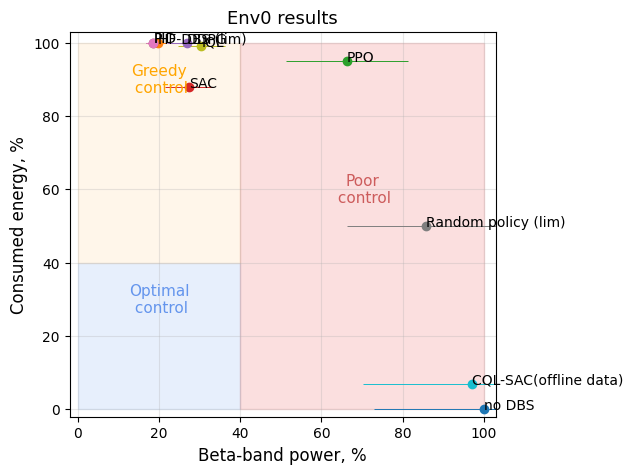

In [5]:
env_iter = env0.copy()

d = {'env1':{}}

for i, row in env_iter.iterrows():
    if row['model'] in ['no_dbs', 'hf_dbs']:
        continue
    argopt = row.filter(regex='bbpow_mean').astype(float).argmin()
    bbpow_mean = row.filter(regex='bbpow_mean').iloc[argopt]
    bbpow_sd = row.filter(regex='bbpow_sd').iloc[argopt]
    energy_mean = row.filter(regex='energy_mean').iloc[argopt]
    energy_sd = row.filter(regex='energy_sd').iloc[argopt]
    d['env1'][row['model']] = {'reward_bbpow':bbpow_mean, 
                               'reward_bbpow_sd':bbpow_sd,   
                               'energy_bbpow':energy_mean,  
                               'energy_bbpow_sd':energy_sd
                               }
    
# ENV 0
pd_env_bbpow = 11.83
hfdbs_energy = 5555
# ENV 1
# pd_env_bbpow = 9.1
# hfdbs_energy = 5555
# ENV 2
# pd_env_bbpow = 11.3
# hfdbs_energy = 5555

plot_scatter_with_whiskers(d, 
                           pd_env_bbpow, 
                           hfdbs_energy, 
                           show_whiskers=True, 
                           annotate_models=True,
                           title='Env0 results',
                           grid_alpha=0.3,
                           use_adjust_text=False
                           )

### Bar-plots

In [14]:
%ls images_draft/

beta_locus_all_neurons_lfp.png  fig2_env_1.pdf
beta_locus_lfp.png              FIG-3-main.pdf
fig1-black-dot.pdf              psd_beta_locus_vs_rest_neurons.png
fig1.pdf                        tmp/
fig2_env_0.pdf


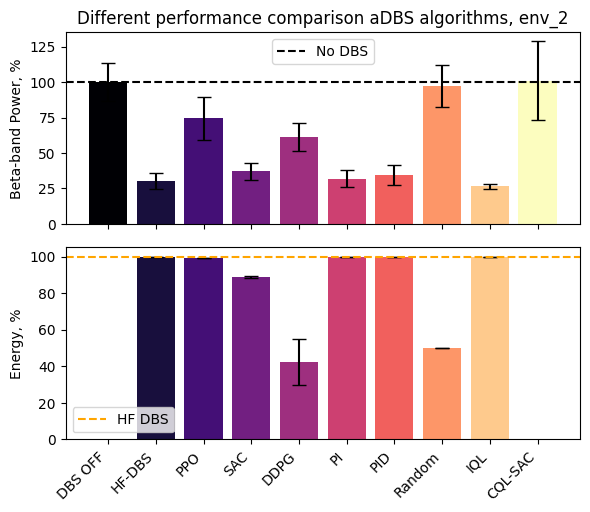

In [16]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

env_iter = env2.copy()
env_name = 'env_2' 

# ENV 0
# pd_env_bbpow = 11.83
# hfdbs_energy = 5555
# ENV 1
# pd_env_bbpow = 9.1
# hfdbs_energy = 5555
# ENV 2
pd_env_bbpow = 11.3
hfdbs_energy = 5555

data = {}

for i, row in env_iter.iterrows():
    argopt = row.filter(regex='bbpow_mean').astype(float).argmin()
    bbpow_mean = row.filter(regex='bbpow_mean').iloc[argopt]
    bbpow_sd = row.filter(regex='bbpow_sd').iloc[argopt]
    energy_mean = row.filter(regex='energy_mean').iloc[argopt]
    energy_sd = row.filter(regex='energy_sd').iloc[argopt]

    # print(i, row['model'], argopt, bbpow_mean)  

    data[row['model']] = {'reward_bbpow':bbpow_mean, 
                          'reward_bbpow_sd':bbpow_sd,   
                          'energy_bbpow':energy_mean,  
                          'energy_bbpow_sd':energy_sd}

labels = list(data.keys())
bbpow_values = [data[key]['reward_bbpow'] / pd_env_bbpow * 100 for key in labels]
bbpow_sd = [data[key]['reward_bbpow_sd'] / pd_env_bbpow * 100 for key in labels]
energy_values = [data[key]['energy_bbpow'] / hfdbs_energy * 100 for key in labels]
energy_sd = [data[key]['energy_bbpow_sd'] / hfdbs_energy * 100 for key in labels]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(6, 5), sharex=True)

# Beta-band power plot
bbpow_cmap = matplotlib.cm.get_cmap('magma')
bbpow_colors = [bbpow_cmap(i) for i in np.linspace(0, 1, len(labels))]

t = np.arange(0, len(labels))
axes[0].bar(t, bbpow_values, color=bbpow_colors, yerr=bbpow_sd, capsize=5)
axes[0].set_ylabel('Beta-band Power, %')
axes[0].axhline(100, label='No DBS', color='black', ls='--')
# axes[0].set_title('Beta-band Power Levels')

# Energy plot
axes[1].bar(t, energy_values, color=bbpow_colors, yerr=energy_sd, capsize=5)
axes[1].set_ylabel('Energy, %')
axes[1].axhline(100, label='HF DBS', color='orange', ls='--')

# axes[1].invert_yaxis()
axes[1].set_xticks(t)
axes[1].set_xticklabels(
    ['DBS OFF', 'HF-DBS', 'PPO', 'SAC',
    'DDPG', 'PI', 'PID', 'Random', 'IQL', 'CQL-SAC'],
    ha='right')

# Common x-axis label
plt.xticks(rotation=45)
plt.tight_layout()
axes[0].legend()
axes[1].legend()

save_name = f'images_draft/fig2_{env_name}.pdf'
plt.savefig(save_name, format='pdf')
axes[0].set_title(f'Different performance comparison aDBS algorithms, {env_name}')
plt.show()

# TODO: half of whiskers remove

# Figure 3: performance detalization

In [1]:
%pwd

'/home/ekuzmina/pd_dbs'

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
from tqdm.notebook import tqdm
from environment.utils import (
    DPI, units2sec,
    generate_w0_with_locus
    )
from environment.env_configs.env0 import (
    n_neurons, grid_size, coord_modif,
    eval_envs_list
)
from environment.env import SpatialKuramoto
from stable_baselines3 import PPO, SAC, DDPG
from aDBS_RL.agents.IQL.agent import IQL

from aDBS_RL.evaluate_HF_DBS import evaluate_policy_
from aDBS_RL.agents.simple_dbs import RandomDBS, HFDBS
import torch

np.random.seed(10)
DIR = 'images_draft'
DIR_ARRAYS = 'data/FIG3'


def make_env(d):
    """
    Creates environment for eval
    """
    env = SpatialKuramoto(params_dict=d)
    return env


# 1. Init model for DBS OFF
eval_d = eval_envs_list[0]
np.random.seed(10)
(w0_eval, ncoords, ngrid,
    w0_temp_eval, w_locus_eval, lmask_eval) = generate_w0_with_locus(
            n_neurons, grid_size,
            coord_modif,
            locus_center=eval_d['locus_center'],
            locus_size=eval_d['locus_size'],
            wmuL=17, wsdL=1, 
            show=False, vertical_layer=4)

eval_d['reward_func'] = 'bbpow_action'
eval_d['neur_coords'] = ncoords
eval_d['neur_grid'] = ngrid

eval_d['w0'] = w0_eval
eval_d['w0_without_locus'] = w0_temp_eval
eval_d['locus_without_w0'] = w_locus_eval
eval_d['locus_mask'] = lmask_eval

eval_d['total_episode_len'] = 1500

eval_d['spatial_feature'] = False
eval_d['dbs_action_bounds'] = [-5, 5]    # NOTE: IMPORTANT!!!

env_dbs_off = make_env(eval_d)

# 2. Init the save model for DBS ON
env_dbs_on = make_env(eval_d)

# 3. Load DBS agent
# model_name = 'data/validation_results/env2_R3_ddpg_VER2/saved_models/env2_R3_ddpg_VER2_2400000_steps.zip'
# model_name = 'data/validation_results/env2_R1_sac_VER2/saved_models/env2_R1_sac_VER2_2400000_steps.zip'
model_name = 'data/validation_results/env2_R2_ppo_VER2_CONT/_CONTINUE_TRAIN/saved_models/env2_R2_ppo_VER2_CONT_2400000_steps.zip'
agent = 'IQL'

if agent == 'PPO':
    model = PPO.load(model_name)
elif agent == 'SAC':
    model = SAC.load(model_name)
elif agent == 'DDPG':
    model = DDPG.load(model_name)
elif agent == 'HF-DBS':
    model = HFDBS(action=1.)
elif agent == 'Random':
    model = RandomDBS(action_magnitude=1.)
elif agent == 'IQL':
    device = 'cuda'
    model = IQL(state_size=env_dbs_on.observation_space.shape[1],
            action_size=env_dbs_on.action_space.shape[0],
            learning_rate=3e-4,
            hidden_size=256,
            tau=5e-3,
            temperature=1,
            expectile=0.7,
            device=device
            )
    model.actor_local.load_state_dict(torch.load(
        # '_kenarius_online_R3_bbpow_Ep300.pth', 
        # '_kenarius_online_R3_thr_Ep300.pth',
        '_kenarius_online_R2_tmp_Ep300.pth', map_location=torch.device(device)))
# 4. Run DBS OFF and DBS ON envs for some N steps
dt_sec = units2sec(env_dbs_off.params_dict['verbose_dt'])
print("verbose dt (in secs):", dt_sec)

No temporal drift events!
DBS affects 512 neurons, min=0.307 & max=1.0
No temporal drift events!
DBS affects 512 neurons, min=0.307 & max=1.0
verbose dt (in secs): 0.0005


In [ ]:
init = env_dbs_off.reset(save_init=False)
solutions = []
recordings = []
for i in tqdm(range(1500)):   # 300
     l = env_dbs_off.step([0.])
     m = env_dbs_off.theta_mean
     r = env_dbs_off.theta_records
     theta_state, rew, is_done, _ = l
     solutions.append(m)
     recordings.append(r)

episode_rewards, true_lfp_DBS_ON, actions_list_DBS_ON = evaluate_policy_(
            model, env_dbs_on, n_envs=1, n_eval_episodes=1,
            render=False, deterministic=True,
            return_episode_rewards=True,
            warn=False, callback=None,)

DBS affects 512 neurons, min=0.307 & max=1.0


  0%|          | 0/1500 [00:00<?, ?it/s]

DBS affects 512 neurons, min=0.307 & max=1.0
DBS affects 512 neurons, min=0.307 & max=1.0


In [22]:
print(true_lfp_DBS_ON.shape)
print(actions_list_DBS_ON.shape)

true_lfp_DBS_OFF = np.concatenate(solutions)
recordings_DBS_OFF = np.concatenate(recordings)

(1, 29029)
(1666, 1, 1)


In [23]:
# Save agents LFP's for plotting 1st part of fig3
import os 
import shutil

print('DIR_ARRAYS: ', DIR_ARRAYS)
RUN_NAME = 'iql_r2_env2'      # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Create direcroty for saving signals 
folder_path = f'{DIR_ARRAYS}/{RUN_NAME}'

if os.path.exists(folder_path): 
    shutil.rmtree(folder_path)
    print(f'Folder {folder_path} existed. Deleted it!', '--'*40)
os.makedirs(folder_path, exist_ok=True)
print('Created directory: ', folder_path)

d = {
    'true_lfp_DBS_ON': true_lfp_DBS_ON,
    'actions_list_DBS_ON': actions_list_DBS_ON,
    'true_lfp_DBS_OFF': true_lfp_DBS_OFF,
    'recordings_DBS_OFF': recordings_DBS_OFF,
}
save_dict_name = f'{folder_path}/{RUN_NAME}.npy'
np.save(save_dict_name, d)

DIR_ARRAYS:  data/FIG3
Created directory:  data/FIG3/iql_r2_env2


In [24]:
# Load needed file
nam = 'data/FIG3/iql_r2_env2/iql_r2_env2.npy'
d = np.load(nam, allow_pickle=True).item()
print('Loaded ', nam)
print(d.keys())

true_lfp_DBS_OFF = d['true_lfp_DBS_OFF']
true_lfp_DBS_ON = d['true_lfp_DBS_ON']
actions_list_DBS_ON = d['actions_list_DBS_ON']

Loaded  data/FIG3/iql_r2_env2/iql_r2_env2.npy
dict_keys(['true_lfp_DBS_ON', 'actions_list_DBS_ON', 'true_lfp_DBS_OFF', 'recordings_DBS_OFF'])


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import filtfilt
from environment.utils import band_pass_envelope


def plot_model_performance(
        #vars
        nodbs_profile,
        dbs_profile,
        time,
        actions_time,
        actions,
        episodes,
        beta_time_performance,
        energy_time_performance,
        #lfp params
        lfp_lims = None, 
        action_lims = None,
        label_fontsize=11,
        ticks_fontsize=9,
        legend_fontsize=9,
        actions_lw = 0.3,
        #psd params
        dt = dt_sec,
        log_scale = True,
        bb_filtered = True,
        psd_xlims = [0, 40],
        psd_ylims = None,
        figure_path=None,
):
    # Create the figure
    fig = plt.figure(figsize=(15, 3.3))

    # Top-level GridSpec:
    # We want total width ratios [5,1,2,2], which naturally group as (5+1)=6 for the first column
    # and (2+2)=4 for the second column => top-level width_ratios=[6, 4]
    outer_gs = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[6, 4], figure=fig)

    # ---- Left side (first two plots) ----
    # Sub-GridSpec with 2 columns (width_ratios=[5,1]) and a small wspace
    gs_left = gridspec.GridSpecFromSubplotSpec(
        nrows=1, ncols=2,
        subplot_spec=outer_gs[0],
        width_ratios=[5, 0.5],
        wspace=0.18  # reduce space only between the first two figures
    )

    # 1) Large time series plot (50% width)
    if lfp_lims is None:
        lfp_max = nodbs_profile.max() * 1.05 
        lfp_min = -lfp_max
        lfp_lims = [lfp_min, lfp_max]

    if action_lims is None:
        action_max = np.max(actions) * 1.05
        action_min = -action_max
        action_lims = [action_min, action_max]

    ax1 = fig.add_subplot(gs_left[0, 0])

    nodbs_profile, _ = band_pass_envelope(nodbs_profile, 1/dt, lowcut=12, highcut=33, order=2)
    dbs_profile, _ = band_pass_envelope(dbs_profile, 1/dt, lowcut=12, highcut=33, order=2)

    ax1.plot(time, nodbs_profile, color='black', alpha=0.9, label='No DBS')
    ax1.plot(time, dbs_profile, color='orange', label='DBS')
    ax1_bis = ax1.twinx()
    cc = '#e95462'
    ax1_bis.plot(actions_time, actions, color=cc, marker='.', 
                 markersize=2.5, lw=actions_lw, label='Actions')
    ax1.set_ylim(lfp_lims)
    ax1.set_xlim([time.min(), time.max()])
    # ax1_bis.set_ylim(action_lims)
    ax1.set_title('Local field potential dynamics', fontsize=label_fontsize)
    ax1.set_xlabel('Time, s', fontsize=label_fontsize)
    ax1.set_ylabel('Time Series Value', fontsize=label_fontsize)
    ax1.set_ylabel('LFP voltage, a.u.', fontsize=label_fontsize)
    ax1_bis.set_ylabel('Action amplitude, a.u.', fontsize=label_fontsize)
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=ticks_fontsize)
    ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticks_fontsize)
    ax1_bis.set_yticklabels(ax1_bis.get_yticklabels(), fontsize=ticks_fontsize)

    # Collect the handles (lines) and their labels from both axes
    lines_main, labels_main = ax1.get_legend_handles_labels()
    lines_bis, labels_bis = ax1_bis.get_legend_handles_labels()

    # Create a single legend on ax4 (could also put it on ax4_bis, but typically you'd pick one)
    ax1.legend(lines_main + lines_bis, labels_main + labels_bis, loc='upper right', fontsize=legend_fontsize)

    # 2) Vertical distribution of time series (10% width)
    ax2 = fig.add_subplot(gs_left[0, 1], sharey=ax1_bis)
    ax2.hist(actions, orientation='horizontal', bins=40, color=cc)
    ax2.set_title('Distribution of\nactions', fontsize=label_fontsize)
    ax2.set_xlabel('Count', fontsize=label_fontsize)
    ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=ticks_fontsize)
    ax2.tick_params(labelleft=False)  # optional: hide y-axis ticks/labels here
    # ax2.set_ylim(action_lims)
    # ax2.set_yticks(ax1_bis.get_yticks())

    # ---- Right side (third and fourth plots) ----
    # Sub-GridSpec with 2 columns (width_ratios=[2,2]) and default (or different) wspace
    gs_right = gridspec.GridSpecFromSubplotSpec(
        nrows=1, ncols=2,
        subplot_spec=outer_gs[1],
        width_ratios=[2, 2],
        wspace=0.26  # can adjust as you like for the third and fourth plots
    )

    # 3) Another curve (20% width)
    ax3 = fig.add_subplot(gs_right[0, 0])

    start_idx, cut_idx = 0, 6000

    if bb_filtered:
        nodbs_profile, _ = band_pass_envelope(nodbs_profile, 1/dt, lowcut=12, highcut=33, order=2)
        dbs_profile, _ = band_pass_envelope(dbs_profile, 1/dt, lowcut=12, highcut=33, order=2)
    n = nodbs_profile.shape[0]
    ft_nodbs = np.abs(np.fft.rfft(nodbs_profile)/n)**2 * 2
    ft_dbs = np.abs(np.fft.rfft(dbs_profile)/n)**2 * 2
    freq = np.fft.rfftfreq(n, dt)

    # filter psd
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html
    filt_params = [1,1,1,1,1,1,1,1,1,]
    ft_n = filtfilt(filt_params, 5, ft_nodbs)
    ft_d = filtfilt(filt_params, 5, ft_dbs)

    if log_scale:
        ax3.semilogy(freq[start_idx:cut_idx], ft_n[start_idx:cut_idx], lw=1.5, label='DBS OFF',
                     color='black', alpha=0.9)
        ax3.semilogy(freq[start_idx:cut_idx], ft_d[start_idx:cut_idx], lw=1.5, label='DBS ON', color='orange')
        ax3.set_ylabel('$Log_{10}$(Power), Volt$^2$/Hz', fontsize=label_fontsize)
    else:
        ax3.plot(freq[start_idx:cut_idx], ft_n[start_idx:cut_idx], lw=1.5, label='DBS OFF',
                 color='black', alpha=0.9)
        ax3.plot(freq[start_idx:cut_idx], ft_d[start_idx:cut_idx], lw=1.5, label='DBS ON', color='orange')
        ax3.set_ylabel('Power, Volt$^2$/Hz', fontsize=label_fontsize)
    ax3.set_xlabel('Frequency, Hz', fontsize=label_fontsize)

    if psd_xlims is None:
        psd_xlims = [0, 130]

    if psd_ylims is None:
        psd_ylims = [1e-6, 1e-1]

    # beta ranges: low (13–20 Hz) and high (21–35 Hz)
    ax3.set_title(f'Power spectral density, filtered', fontsize=label_fontsize)
    ax3.legend(fontsize=legend_fontsize, loc='upper right')
    ax3.set_ylim(psd_ylims)
    ax3.set_xlim(psd_xlims)
    ax3.axvspan(4, 12.5, alpha=0.15, color='green', label='LF')
    ax3.axvspan(12.5, 21, alpha=0.15, color='blue', label='Low beta band')
    ax3.axvspan(21, 35, alpha=0.15, color='red', label='High beta band')
    ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=ticks_fontsize)
    ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=ticks_fontsize)
    
    # 4) Two lines with an additional y-axis (20% width)
    ax4 = fig.add_subplot(gs_right[0, 1])
    ax4.plot(episodes, beta_time_performance, color='purple', label='Beta performance')
    ax4.set_title('Resilience to perturbations', fontsize=label_fontsize)
    ax4_bis = ax4.twinx()
    ax4_bis.plot(episodes, energy_time_performance, color='seagreen', label='Energy consumption')
    ax4.set_ylabel('Beta band power, Volt$^2$/Hz', fontsize=label_fontsize)
    ax4.set_xlabel('Drift episode', fontsize=label_fontsize)
    ax4_bis.set_ylabel('Energy consumption, J', fontsize=label_fontsize)
    ax4.set_xticks(episodes[::2])
    ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=ticks_fontsize)
    ax4.set_yticklabels(ax4.get_yticklabels(), fontsize=ticks_fontsize)
    ax4_bis.set_yticklabels(ax4.get_yticklabels(), fontsize=ticks_fontsize)

    # Collect the handles (lines) and their labels from both axes
    lines_main, labels_main = ax4.get_legend_handles_labels()
    lines_bis, labels_bis = ax4_bis.get_legend_handles_labels()

    # Create a single legend on ax4 (could also put it on ax4_bis, but typically you'd pick one)
    ax4.legend(lines_main + lines_bis, labels_main + labels_bis, loc='upper left', fontsize=legend_fontsize)

    plt.tight_layout()
    if figure_path is not None:
        plt.savefig(figure_path, format='pdf')
    plt.show()

In [26]:
# actions_list_DBS_ON[:, 0].shape
# true_lfp_DBS_OFF.shape[0], actions_list_DBS_ON[:, 0].shape[0]
# pp = round((NN * 100)/true_lfp_DBS_OFF.shape[0], 2)
# actions_list_DBS_ON[:, 0].shape[0] * pp / 100

/tmp/ipykernel_28236/3102971094.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_28236/3102971094.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_28236/3102971094.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1_bis.set_yticklabels(ax1_bis.get_yticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_28236/3102971094.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_28236/3102971094.py:155: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_28236/3102971094.py:156: UserWarning: FixedFormatter sho

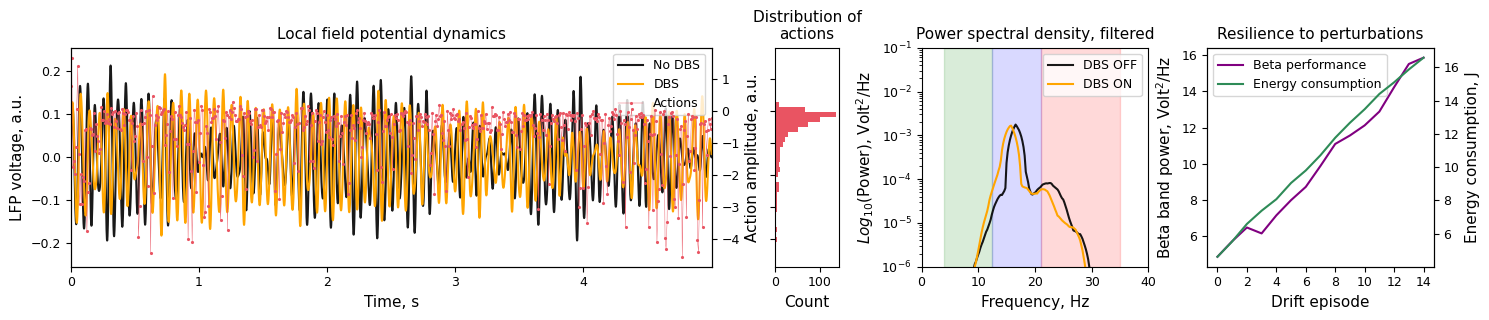

In [27]:
#input
np.random.seed(11)

FIGURE_NAME = 'images_draft/FIG-3-iql-r2-main.pdf'  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

def rescale_action(action):
    x, y = [-1, 1] # original_range
    z, k = [-5, 5]  # target_range
    new_action = z + ((k - z) * (action - x)) / (y - x)
    return new_action

NN = 10_000
MM = 634
nodbs_profile = true_lfp_DBS_OFF[:NN]
dbs_profile = true_lfp_DBS_ON[0][:NN]

time = np.arange(0, len(nodbs_profile)) * dt_sec

actions = rescale_action(actions_list_DBS_ON[:, 0])[:MM]
actions_time = np.linspace(0, time[-1], actions.shape[0])

# Blank for filling last plot
episodes = np.arange(15)
beta_time_performance = np.cumsum(np.random.randn(episodes.shape[0])* 0.5 + 1) + 3
energy_time_performance = np.cumsum(np.random.randn(episodes.shape[0])*0.2 + 1)

plot_model_performance(nodbs_profile,
                       dbs_profile,
                       time, actions_time, actions,
                       episodes, beta_time_performance,
                       energy_time_performance,
                       bb_filtered=False,
                       figure_path = FIGURE_NAME)

### Perturbations code

In [ ]:
# We import env version 
from environment.env_configs.env2 import (
    n_neurons, grid_size, coord_modif,
    eval_envs_list
)
import os 
import numpy as np
import shutil
np.random.seed(228)
from environment.utils import (
    generate_w0_with_locus,
    band_pass_envelope)
from scipy.signal import filtfilt
from environment.env import SpatialKuramoto
from stable_baselines3 import PPO, SAC, DDPG
from aDBS_RL.agents.simple_dbs import HFDBS
from copy import deepcopy
import matplotlib.pyplot as plt
from aDBS_RL.evaluate_HF_DBS import evaluate_policy_

2025-02-21 21:17:35.996466: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ekuzmina/miniforge3/envs/kur39/lib/python3.9/site-packages/cv2/../../lib64:
2025-02-21 21:17:35.996560: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ekuzmina/miniforge3/envs/kur39/lib/python3.9/site-packages/cv2/../../lib64:
2025-02-21 21:17:35.996569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [ ]:
def make_env(d):
    """
    Creates environment for eval
    """
    env = SpatialKuramoto(params_dict=d)
    return env


def init_envs(NUMBER_OF_ENV, name_log_dir='eval_env2'):
    # 1. Instantiate environments for evaluation
    eval_envs_list_new = []
    for n_env in range(NUMBER_OF_ENV):
        eval_d = eval_envs_list[n_env]

        (w0_eval, ncoords, ngrid,
            w0_temp_eval, w_locus_eval, lmask_eval) = generate_w0_with_locus(
                    n_neurons, grid_size,
                    coord_modif,
                    locus_center=eval_d['locus_center'],
                    locus_size=eval_d['locus_size'],
                    wmuL=17, wsdL=1, 
                    show=False, vertical_layer=4)
        
        eval_d['reward_func'] = 'bbpow_action'
        eval_d['neur_coords'] = ncoords
        eval_d['neur_grid'] = ngrid
        eval_d['w0'] = w0_eval
        eval_d['w0_without_locus'] = w0_temp_eval
        eval_d['locus_without_w0'] = w_locus_eval
        eval_d['locus_mask'] = lmask_eval
        eval_d['total_episode_len'] = 1000
        eval_d['spatial_feature'] = False
        eval_d['dbs_action_bounds'] = [-5, 5]

        ################## Define temporal features
        eval_d['save_events'] = True

        # 2. We make savings of temporal events files
        # with uniques name for each env
        lpath = f'data/perturbation_experiment/{name_log_dir}_{n_env}'
        eval_d['log_path'] = lpath

        if os.path.exists(lpath): 
            shutil.rmtree(lpath)
            print('Folder existed. Deleted it!', '--'*40)

        os.makedirs(lpath, exist_ok=True)
        print('Created directory: ', lpath)
        
        eval_d['temporal_drift'] = True
        eval_d['random_freq_update'] = False
        eval_d['electrode_drift_freq'] = 7
        eval_d['plasticity_drift_freq'] = 1
        eval_d['plasticity_percent'] = 1.5   # [%]
        eval_d['reset_plasticity_episode'] = 10
        eval_d['encapsulation_drift_freq'] = 5
        eval_d['encapsulation_percent'] = 4    # [%]
        eval_d['mov_modulation_drift_freq'] = 3

        eval_envs_list_new.append(make_env(eval_d))
        
    return eval_envs_list_new

In [4]:
### Set parameters for validation 
NUMBER_OF_ENV = 2
each_env_run_episodes = 4

Folder existed. Deleted it! --------------------------------------------------------------------------------
Created directory:  data/perturbation_experiment/eval_env2_0
Reseting plastisity...


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


DBS affects 512 neurons, min=0.175 & max=1.0
Folder existed. Deleted it! --------------------------------------------------------------------------------
Created directory:  data/perturbation_experiment/eval_env2_1
Reseting plastisity...
DBS affects 512 neurons, min=0.123 & max=1.0


In [ ]:
# 2. Init envs for evaluation 
envs_cpu = init_envs(NUMBER_OF_ENV=NUMBER_OF_ENV)

In [5]:
# 4. Run evaluation for all envs (handmade)
def calc_psd(sig_envs, psd_dt, cut_idx=1500, log_scale=True,
            beta_a=12.5, beta_b=21):
    sig = sig_envs
    sig_filt, _ = band_pass_envelope(sig, 1/psd_dt, order=2)
    ft = np.abs(np.fft.rfft(sig_filt)/sig_filt.shape[0])**2 * 2
    freq = np.fft.rfftfreq(sig_filt.shape[0], psd_dt)
    ft = filtfilt([1,1,1,1,1,1,1,1,1,1,1,1,], 5, ft)
    # Also calculate beta band power
    idx = np.where((freq > beta_a) & (freq < beta_b))
    res = np.sum(ft[idx])
    return res


def rescale_action(action):
    x, y = [-1, 1] # original_range
    z, k = [-5, 5]  # target_range
    new_action = z + ((k - z) * (action - x)) / (y - x)
    return new_action


def eval_for_fig3(model, envs_cpu):

    bbpow_list = []   # shape: [env x episodes]
    energy_list = []    # shape: [env x episodes]
    for env in envs_cpu:

        per_episode_bbpow = []
        per_episode_energy = []
        episode_rewards, true_lfp, actions_list = evaluate_policy_(
                    model, env, n_envs=1, n_eval_episodes=each_env_run_episodes,
                    render=False, deterministic=True, return_episode_rewards=True,
                    warn=False, callback=None,)
        print('actions_list ', actions_list)

        true_lfp = true_lfp[0]
        action_episode_len = int(len(actions_list) / each_env_run_episodes)
        print('action_episode_len: ', action_episode_len)
        lft_episode_len = int(len(true_lfp) / each_env_run_episodes)

        # Extract values per episode
        s, e = 0, lft_episode_len
        s2, e2 = 0, action_episode_len
        for r in range(each_env_run_episodes):

            # Beta band power
            lfp_per_episode = true_lfp[s:e]
            bbpow = calc_psd(lfp_per_episode, psd_dt=0.0005)  # NOTE: hardcode dt
            per_episode_bbpow.append(bbpow)
            s = deepcopy(e)
            e += lft_episode_len

            # Actions energy
            e_per_episode = actions_list[s2:e2]
            u_energy = np.sum(np.abs(e_per_episode), axis=0)
            s2 = deepcopy(e2)
            e2 += action_episode_len
            per_episode_energy.append(u_energy[0])

        bbpow_list.append(per_episode_bbpow)
        energy_list.append(per_episode_energy)

    bbpow_list = np.asarray(bbpow_list)
    energy_list = np.asarray(energy_list)
    return bbpow_list, energy_list, action_episode_len

# 3. Load model
model_name = 'data/validation_results/env2_R1_sac_VER2/saved_models/env2_R1_sac_VER2_2400000_steps.zip'
agent = 'SAC'

if agent == 'PPO':
    model = PPO.load(model_name)
elif agent == 'SAC':
    model = SAC.load(model_name)
elif agent == 'DDPG':
    model = DDPG.load(model_name)

# Run validation for our model
bbpow, energy, a_len = eval_for_fig3(model, envs_cpu)   # TMP uncomment and debug

# Rescale energy between [-5, 5]
energy_rescaled = [rescale_action(e) for e in energy]

/home/ekuzmina/miniforge3/envs/kur39/lib/python3.9/site-packages/stable_baselines3/common/buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 18.73GB > 15.32GB
  warnings.warn(


Drift of w0 by 1.5%, to 1
DBS affects 512 neurons, min=0.175 & max=1.0
Drift of w0 by 1.5%, to 2
DBS affects 512 neurons, min=0.175 & max=1.0
Drift of w0 by 1.5%, to 3
DBS affects 512 neurons, min=0.175 & max=1.0
Drift of w0 by 1.5%, to 4
DBS affects 512 neurons, min=0.175 & max=1.0
Electode encapsulation! Reduced electrode conductances by 4%
Drift of w0 by 1.5%, to 5
DBS affects 512 neurons, min=0.175 & max=1.0
actions_list  [[-0.95447844]
 [-0.92757523]
 [-0.87860876]
 ...
 [-0.88675535]
 [-0.82595736]
 [-0.8620569 ]]
action_episode_len:  1111
Drift of w0 by 1.5%, to 1
DBS affects 512 neurons, min=0.123 & max=1.0
Drift of w0 by 1.5%, to 2
DBS affects 512 neurons, min=0.123 & max=1.0
Drift of w0 by 1.5%, to 3
DBS affects 512 neurons, min=0.123 & max=1.0
Drift of w0 by 1.5%, to 4
DBS affects 512 neurons, min=0.123 & max=1.0
Electode encapsulation! Reduced electrode conductances by 4%
Drift of w0 by 1.5%, to 5
DBS affects 512 neurons, min=0.123 & max=1.0
actions_list  [[-0.9443554 ]
 [-

In [6]:
# 4. Run in parallel the same env without DBS, for reference

# TODO: init their own envs for hf-dbs 
envs_hf_dbs = init_envs(NUMBER_OF_ENV, name_log_dir='eval_env2_hf_dbs')

nodbs_model = HFDBS(action=0.)   # noDBS model
bbpow_NODBS, energy_NODBS, _ = eval_for_fig3(nodbs_model, envs_hf_dbs)

Folder existed. Deleted it! --------------------------------------------------------------------------------
Created directory:  data/perturbation_experiment/eval_env2_hf_dbs_0
Reseting plastisity...
DBS affects 512 neurons, min=0.175 & max=1.0
Folder existed. Deleted it! --------------------------------------------------------------------------------
Created directory:  data/perturbation_experiment/eval_env2_hf_dbs_1
Reseting plastisity...
DBS affects 512 neurons, min=0.123 & max=1.0
Drift of w0 by 1.5%, to 1
DBS affects 512 neurons, min=0.175 & max=1.0
Drift of w0 by 1.5%, to 2
DBS affects 512 neurons, min=0.175 & max=1.0
Drift of w0 by 1.5%, to 3
DBS affects 512 neurons, min=0.175 & max=1.0
Drift of w0 by 1.5%, to 4
DBS affects 512 neurons, min=0.175 & max=1.0
Electode encapsulation! Reduced electrode conductances by 4%
Drift of w0 by 1.5%, to 5
DBS affects 512 neurons, min=0.175 & max=1.0
actions_list  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
action_episode_len:  1111
Drift of w0 

In [7]:
# Save all runs
save_runs_name = 'data/fig3_perturn_env_run.npy'
d = {'bbpow': bbpow,
     'energy_rescaled': energy_rescaled,
     'a_len': a_len,
     'bbpow_NODBS': bbpow_NODBS}
np.save(save_runs_name, d)

In [3]:
##### HERE LOAD RUNS FROM SCRIPT

# save_runs_name = 'data/fig3_perturn_env_run_HF_DBS.npy' # 1. hf dbs with encaps freq=5, %=9
# save_runs_name =  'data/perturbation_exp_sac_r1.npy'   # 2. sac r1, with encaps freq=5, %=9
# save_runs_name = 'data/perturbation_exp_hf_dbs_2.npy'    # 3. hf dbs
# save_runs_name = 'data/perturbation_exp/new_hf_dbs_test.npy'  # 4. hf dbs with correct conductancy
save_runs_name = 'data/perturbation_exp/iql_r2.npy' 
# save_runs_name = 'data/perturbation_exp/ddpg_r3_new.npy'
# save_runs_name = 'data/perturbation_exp/random_new.npy'
# save_runs_name = 'data/perturbation_exp/ppo_new.npy'

d2 = np.load(save_runs_name, allow_pickle=True)
d2.item().keys()

# d2.item()['bbpow'].shape

dict_keys(['bbpow', 'energy_rescaled', 'a_len', 'bbpow_NODBS'])

In [4]:
# Take 0th eval env for logging and load highest file idx
# lpath = 'data/perturbation_exp_hf_DBS/eval_env2_0'  # 1. hf dbs with encaps freq=5, %=9
# lpath = 'data/perturbation_exp_sac_r1/eval_env2_0'  # 2. sac r1, with encaps freq=5, %=9
# lpath = 'data/perturbation_exp/new_hf_dbs_test/eval_env2_0'  # 3. hf dbs with correct conductancy
lpath = 'data/perturbation_exp/iql_r2/eval_env2_0'  # 4. 
# lpath = 'data/perturbation_exp/ddpg_r3_new/eval_env2_0'
# lpath = 'data/perturbation_exp/ppo_new/eval_env2_0'


temporal_logs_dirs = os.listdir(lpath)
print('temporal_logs_dirs ', temporal_logs_dirs)

max_file = max(temporal_logs_dirs, key=lambda x: int(x[5:-4]))
print('max_file: ', max_file)
t_events_dict = np.load(os.path.join(lpath, max_file),
                        allow_pickle=True)
t_events_dict = t_events_dict.item()

temporal_logs_dirs  ['temp_12.npy', 'temp_16.npy', 'temp_15.npy', 'temp_5.npy', 'temp_10.npy', 'temp_22.npy', 'temp_14.npy', 'temp_6.npy', 'temp_4.npy', 'temp_7.npy', 'temp_18.npy', 'temp_19.npy', 'temp_13.npy', 'temp_21.npy', 'temp_2.npy', 'temp_3.npy', 'temp_20.npy', 'temp_9.npy', 'temp_17.npy', 'temp_8.npy', 'temp_11.npy']
max_file:  temp_22.npy


In [5]:
bbpow = d2.item()['bbpow']
energy_rescaled = d2.item()['energy_rescaled']
a_len = d2.item()['a_len']
bbpow_NODBS = d2.item()['bbpow_NODBS']

In [ ]:
from matplotlib.gridspec import GridSpec

def calc_var_up_down_intervals(data):
    mean_signal = np.mean(data, axis=0)
    std_signal = np.std(data, axis=0, ddof=1)
    # Upper and lower bounds using variance
    upper_bound = mean_signal + std_signal
    lower_bound = mean_signal - std_signal
    return mean_signal, std_signal, upper_bound, lower_bound

def to_percents(hf_dbs_maxampl, mean_signal, std_signal,
                upper_bound, lower_bound):
    mean_signal_percent = mean_signal * 100 / hf_dbs_maxampl
    std_signal_percent = std_signal * 100 / hf_dbs_maxampl
    upper_bound_percent = upper_bound * 100 /  hf_dbs_maxampl
    lower_bound_percent = lower_bound * 100 / hf_dbs_maxampl
    return (mean_signal_percent, std_signal_percent, 
            upper_bound_percent, lower_bound_percent) 


def plot_perturb_test(bbpow, bbpow_NODBS, energy_rescaled,
                      percent_scale, save_name=None, energy_ylim=None):

    ORANGE = '#F47A20'
    BLACK = '#1B1719'

    # 5. Plotting. Load logs with temporal events 
    fig = plt.figure(figsize=(5, 4))
    fig.suptitle("aDBS supression efficiency test")

    gs = GridSpec(2, 1, height_ratios=[4, 1])
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    all_temp_events_name = t_events_dict.keys()

    y = 0
    events_marks = ['D', 'h', 's']  # 's'
    # events_marks = ['H', 'h', 'p']  # 's'
    event_colors = ['#FA7AA5', '#FA7269', '#F97956']
    event_sizes = [40, 55, 40]
    for idx, k in enumerate(all_temp_events_name):

        t = t_events_dict[k]
        for_plotting_list = []
        
        for event in t_events_dict[k]:
            for_plotting_list.append(event[0])
            ax2.axvline(event[0], c='grey', alpha=0.1)
            ax1.axvline(event[0], c='grey', alpha=0.1)

        ys = np.ones(len(for_plotting_list)) * y
        ax2.scatter(for_plotting_list, ys, marker=events_marks[idx],
                    color=event_colors[idx], s=event_sizes[idx], zorder=5,
                    edgecolors='black',
                    )
        ax2.axhline(y, c='black', zorder=0, alpha=0.8)
        y += 1
        if idx == 2:
            break

    ax11 = ax1.twinx()

    ### Plot main signals
    bbpow_y = np.arange(1, bbpow[0].shape[0] + 1)  # Generate times y-axis

    # We take mean and var across all envs
    bbpow_MEAN, bbpow_SD, bbpow_UPPER, bbpow_LOWER = calc_var_up_down_intervals(bbpow)

    (bbpow_NODBS_MEAN, bbpow_NODBS_SD,
    bbpow_NODBS_UPPER, bbpow_NODBS_LOWER) = calc_var_up_down_intervals(bbpow_NODBS)

    if not percent_scale:
        # with DBS
        ax1.plot(bbpow_y, bbpow_MEAN*1000, c=ORANGE)  # linewidth
        ax1.scatter(bbpow_y, bbpow_MEAN*1000, c=ORANGE, label='bbpow-DBS ON')  # linewidth
        ax1.fill_between(bbpow_y, bbpow_LOWER*1000, bbpow_UPPER*1000,
                        color=ORANGE, alpha=0.1,)   
        # without DBS
        ax1.plot(bbpow_y, bbpow_NODBS_MEAN*1000, c=BLACK)  # linewidth
        ax1.scatter(bbpow_y, bbpow_NODBS_MEAN*1000, c=BLACK, label='bbpow-DBS OFF')  # linewidth
        ax1.fill_between(bbpow_y, bbpow_NODBS_LOWER*1000,
                        bbpow_NODBS_UPPER*1000, color=BLACK, alpha=0.1,)
    else:
        DIV = bbpow_MEAN / bbpow_NODBS_MEAN * 100
        DIV_UPPER = bbpow_UPPER / bbpow_NODBS_MEAN * 100
        DIV_LOWER = bbpow_LOWER / bbpow_NODBS_MEAN * 100
        ax1.plot(bbpow_y, DIV, c=BLACK)  # linewidth
        ax1.scatter(bbpow_y, DIV, c=BLACK, label='ratio')  # linewidth
        ax1.fill_between(bbpow_y, DIV_UPPER, DIV_LOWER, color=BLACK, alpha=0.1,) 
         
    # We take mean across all envs
    (energy_rescaled_MEAN, energy_rescaled_SD,
    energy_rescaled_UPPER,
    energy_rescaled_LOWER) = calc_var_up_down_intervals(energy_rescaled)

    # if not percent_scale:
    # Conver energy to percent from HF-DBS 
    hf_dbs_maxampl = a_len * 5                             
    E = energy_rescaled_MEAN * 100 / hf_dbs_maxampl
    E_sd = energy_rescaled_SD * 100 / hf_dbs_maxampl
    E_upper = energy_rescaled_UPPER * 100 / hf_dbs_maxampl
    E_lower = energy_rescaled_LOWER * 100 / hf_dbs_maxampl

    cc = '#e95462'
    ax11.plot(bbpow_y, E, 'o--', c=cc, label='DBS energy')  # linewidth
    ax11.fill_between(bbpow_y, E_lower[:, 0], E_upper[:, 0], color=cc, alpha=0.1,)  
    # ax11.fill_between(bbpow_y, E_lower, E_upper, color=cc, alpha=0.1,)

    ax2.set_ylim([-0.5, 2.5])
    ax2.set_xticks(np.arange(0, len(t_events_dict['plasticity_drift']), 2))
    ax2.tick_params(axis='x', which='major', labelsize=9)
    # ax2.xaxis.set_ticks(np.arange(0, len(t_events_dict['plasticity_drift']), 2))
    ax1.xaxis.set_ticks(np.arange(0, len(t_events_dict['plasticity_drift']), 2))
    ax2.set_xlabel('Temporal drift episodes', fontsize=13)
    # ax2.set_ylabel('Drift types')

    if percent_scale:
        ax1.set_ylim([0, 100])
        if energy_ylim is None:
            ax11.set_ylim([0, 100])
        else:
            ax11.set_ylim(energy_ylim)
    if percent_scale:
        ax1.set_ylabel('DBS ON-OFF beta-band power ratio')
    else:
        ax1.set_ylabel('Beta-band power, mV$^2$')

    ax11.set_ylabel('Energy percent of HF-DBS, %')

    plt.tight_layout()
    if save_name is not None:
        plt.savefig(save_name, format='pdf')
    plt.show()

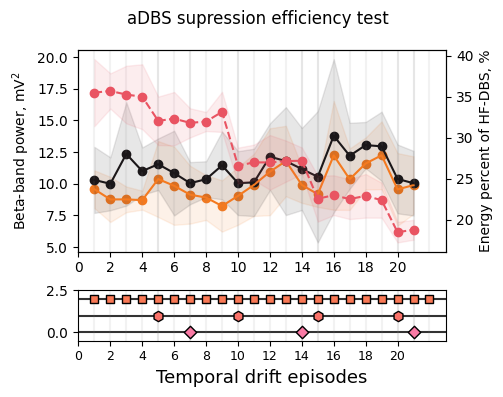

In [ ]:
IMG_NAME = 'images_draft/fig3_2PART_iql_54.pdf'  #  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
plot_perturb_test(bbpow, bbpow_NODBS, energy_rescaled, 
                  percent_scale=False, 
                  save_name=IMG_NAME,
                  energy_ylim=None)

### Phase plot 

y-labels:  ['−1', 'Electrode \ndrift', 'Encaps. \ndrift', 'Plasticity \ndrift', '3']


/tmp/ipykernel_18139/1883434345.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels)


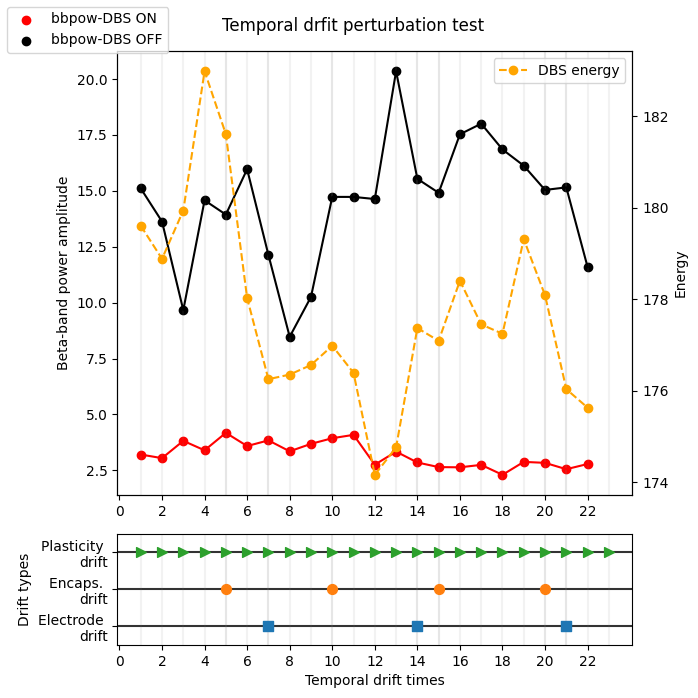

In [ ]:
from matplotlib.gridspec import GridSpec

ENV_IDX = 1
# 5. Plotting. Load logs with temporal events 
fig = plt.figure(figsize=(7, 7))
fig.suptitle("Temporal drfit perturbation test")

gs = GridSpec(2, 1, height_ratios=[4, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

all_temp_events_name = t_events_dict.keys()

y = 0
for_plotting_dict = {}  # We remake a little bit the structure of logs
events_marks = ['s', 'o', '>']
for idx, k in enumerate(all_temp_events_name):

    t = t_events_dict[k]
    for_plotting_list = []
    
    for event in t_events_dict[k]:
        for_plotting_list.append(event[0])
        ax2.axvline(event[0], c='grey', alpha=0.1)
        ax1.axvline(event[0], c='grey', alpha=0.1)

    ys = np.ones(len(for_plotting_list)) * y
    ax2.scatter(for_plotting_list, ys, marker=events_marks[idx], s=50, zorder=5)
    ax2.axhline(y, c='black', zorder=0, alpha=0.8)
    y += 1
    if idx == 2:
        break

ax11 = ax1.twinx()

### Plot main signals
bbpow_y = np.arange(1, bbpow[ENV_IDX].shape[0] + 1)

ax1.plot(bbpow_y, bbpow[ENV_IDX]*1000, c='red')  # linewidth
ax1.scatter(bbpow_y, bbpow[ENV_IDX]*1000, c='red', label='bbpow-DBS ON')  # linewidth

ax1.plot(bbpow_y, bbpow_NODBS[ENV_IDX]*1000, c='black')  # linewidth
ax1.scatter(bbpow_y, bbpow_NODBS[ENV_IDX]*1000, c='black', label='bbpow-DBS OFF')  # linewidth

# Conver energy to percent from HF-DBS 
# a_len = 555
hf_dbs_maxampl = a_len * 5 # 5555                               # NOTE: hardcoding here!
E = energy_rescaled[ENV_IDX] * 100 / hf_dbs_maxampl

ax11.plot(bbpow_y, E, 'o--', c='orange', label='DBS energy')  # linewidth
# ax2.plot(bbpow_y, energy[1], 'go--', label='energy')

ax2.set_ylim([-0.5, 2.5])
ax2.xaxis.set_ticks(np.arange(0, len(t_events_dict['plasticity_drift']), 2))
ax1.xaxis.set_ticks(np.arange(0, len(t_events_dict['plasticity_drift']), 2))
ax2.set_xlabel('Temporal drift times')
ax2.set_ylabel('Drift types')

labels = [item.get_text() for item in ax2.get_yticklabels()]
l = list(all_temp_events_name)
labels[1] =  f'Electrode \ndrift'  #  l[0]
labels[2] =  f'Encaps. \ndrift' # l[1]
labels[3] = f'Plasticity \ndrift'  #l[2]  
print('y-labels: ', labels)
ax2.set_yticklabels(labels)

ax1.set_ylabel('Beta-band power amplitude')
ax11.set_ylabel('Energy')

# plt.legend()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left')

plt.legend()
plt.tight_layout()
plt.show()

# Figure 1: data of beta packs

In [ ]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm.notebook import tqdm
from scipy.signal import filtfilt
from environment.utils import (
    units2sec, generate_w0_with_locus,
    band_pass_envelope)

from environment.env_configs.env0 import params_dict_train
from environment.env import SpatialKuramoto
from aDBS_RL.agents.simple_dbs import HFDBS
np.random.seed(10)

DIR = 'images_draft'

In [ ]:
pdict = params_dict_train.copy()

n_neurons = 512
grid_size = [8, 8, 8]
coord_modif = 0.1
locus_center = [4, 4, 4]
locus_size = 0.55
(w0, ncoords, ngrid,
        w0_temp, w_locus, lmask) = generate_w0_with_locus(
                n_neurons, grid_size,
                coord_modif,
                locus_center=pdict['locus_center'],
                locus_size=pdict['locus_size'] ,
                wmuL=17, wsdL=1, 
                show=False)

pdict['neur_coords'] = ncoords
pdict['verbose'] = 1
pdict['neur_grid'] = ngrid
pdict['reward_func'] = 'bbpow_action'
pdict['w0'] = w0
pdict['w0_without_locus'] = w0_temp
pdict['locus_without_w0'] = w_locus
pdict['locus_mask'] = lmask
pdict['temporal_drift'] = False
pdict['spatial_feature'] = False

# Instantiate the env
env = SpatialKuramoto(params_dict=pdict)

dt_sec = units2sec(env.params_dict['verbose_dt'])
print("verbose dt (in secs):", dt_sec)

# Run uncontrolled environment
# ----------------------------------------
theta_state = env.reset(save_init=False)
solutions = []
recordings = []
for i in tqdm(range(500)):   # 2000
     l = env.step([0.])
     m = env.theta_mean
     r = env.theta_records
     theta_state, rew, is_done, _ = l
     solutions.append(m)
     recordings.append(r)
# ----------------------------------------
# constant DBS
theta_state = env.reset(save_init=False)
agent = HFDBS(
     action=5   #**trial.params
     )
solutions_constant_dbs = []
recordings_constant_dbs = []
for i in tqdm(range(500)):   # 2000

     action, _ = agent.predict(theta_state)
     l = env.step(action)
     m = env.theta_mean
     r = env.theta_records
     theta_state, rew, is_done, _ = l
     solutions_constant_dbs.append(m)
     recordings_constant_dbs.append(r)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-02-05 19:12:58.470362: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ekuzmina/miniforge3/envs/kur39/lib/python3.9/site-packages/cv2/../../lib64:
2025-02-05 19:12:58.470465: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ekuzmina/miniforge3/envs/kur39/lib/python3.9/site-packages/cv2/../../lib64:
2025-02-05 19:12:58.470475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


No temporal drift events!
DBS affects 512 neurons, min=0.307 & max=1.0
verbose dt (in secs): 0.0005
DBS affects 512 neurons, min=0.307 & max=1.0


  0%|          | 0/500 [00:00<?, ?it/s]

DBS affects 512 neurons, min=0.307 & max=1.0


  0%|          | 0/500 [00:00<?, ?it/s]

/tmp/ipykernel_12364/599297814.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_12364/599297814.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_12364/599297814.py:100: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_12364/599297814.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_12364/599297814.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=ticks_fontsize)
/tmp/ipykernel_12364/599297814.py:143: UserWarning: FixedFormatter should only be 

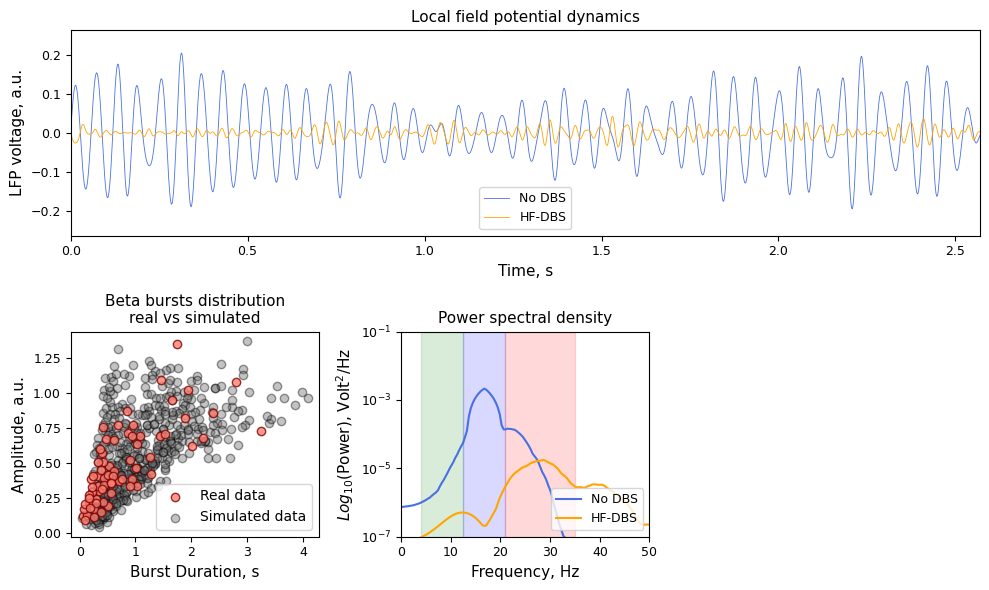

In [ ]:
def plot_fig1(
        #vars
        nodbs_profile,
        dbs_profile,
        time,
		burst_coords_real,
		burst_coords_sim=None,
        #lfp params
        lfp_lims = None, 
        #psd params
        dt = 0.0005,
        # dt = units2sec(env.params_dict['verbose_dt']),
        log_scale = True,
        bb_filtered = False,
        psd_xlims = [0, 60],
        psd_ylims = None,
        #other figure params
        figure_path=None,
        label_fontsize=11,
        ticks_fontsize=9,
        legend_fontsize=9,
):
	# Create the figure
	fig = plt.figure(figsize=(10, 6))

	# Top-level GridSpec:
	gs = gridspec.GridSpec(ncols=3, nrows=2, width_ratios=[2, 2, 2], 
									height_ratios=[1, 1], figure=fig)

	# 1) Large time series plot (50% width)
	if lfp_lims is None:
		lfp_max = nodbs_profile.max() * 1.05 
		lfp_min = -lfp_max
		lfp_lims = [lfp_min, lfp_max]

	if bb_filtered:
		nodbs_profile, _ = band_pass_envelope(nodbs_profile, 1/dt, lowcut=12, highcut=33, order=2)
		dbs_profile, _ = band_pass_envelope(dbs_profile, 1/dt, lowcut=12, highcut=33, order=2)

	ax1 = fig.add_subplot(gs[0, :3])
	ax1.plot(time, nodbs_profile, color='royalblue', label='No DBS', alpha=0.95, lw=0.6)
	ax1.plot(time, dbs_profile, color='orange', label='HF-DBS', lw=0.6)
	ax1.set_ylim(lfp_lims)
	ax1.set_xlim([time.min(), time.max()])
	ax1.set_title('Local field potential dynamics', fontsize=label_fontsize)
	ax1.set_xlabel('Time, s', fontsize=label_fontsize)
	ax1.set_ylabel('Time Series Value', fontsize=label_fontsize)
	ax1.set_ylabel('LFP voltage, a.u.', fontsize=label_fontsize)
	ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=ticks_fontsize)
	ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=ticks_fontsize)
	ax1.legend(fontsize=legend_fontsize,)

    # 2) Vertical distribution of time series (10% width)
	ax2 = fig.add_subplot(gs[1, 1])
	start_idx, cut_idx = 0, 6000
	n = nodbs_profile.shape[0]
	ft_nodbs = np.abs(np.fft.rfft(nodbs_profile)/n)**2 * 2
	ft_dbs = np.abs(np.fft.rfft(dbs_profile)/n)**2 * 2
	freq = np.fft.rfftfreq(n, dt)

	# filter psd, https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html
	filt_params = [1,1,1,1,1,1,1,1,1,]
	ft_n = filtfilt(filt_params, 5, ft_nodbs)
	ft_d = filtfilt(filt_params, 5, ft_dbs)

	if log_scale:
		ax2.semilogy(freq[start_idx:cut_idx], ft_n[start_idx:cut_idx], lw=1.5, label='No DBS', color='royalblue', alpha=0.95)
		ax2.semilogy(freq[start_idx:cut_idx], ft_d[start_idx:cut_idx], lw=1.5, label='HF-DBS', color='orange')
		ax2.set_ylabel('$Log_{10}$(Power), Volt$^2$/Hz', fontsize=label_fontsize)
	else:
		ax2.plot(freq[start_idx:cut_idx], ft_n[start_idx:cut_idx], lw=1.5, label='No DBS', color='royalblue')
		ax2.plot(freq[start_idx:cut_idx], ft_d[start_idx:cut_idx], lw=1.5, label='HF-DBS', color='orange')
		ax2.set_ylabel('Power, Volt$^2$/Hz', fontsize=label_fontsize)
	ax2.set_xlabel('Frequency, Hz', fontsize=label_fontsize)

	if psd_xlims is None:
		psd_xlims = [0, 100]

	if psd_ylims is None:
		psd_ylims = [1e-6, 1e-1]

	# beta ranges: low (13–20 Hz) and high (21–35 Hz)
	ax2.set_title(f'Power spectral density', fontsize=label_fontsize)
	ax2.legend(fontsize=legend_fontsize, loc='lower right')
	ax2.set_ylim(psd_ylims)
	ax2.set_xlim(psd_xlims)
	ax2.axvspan(4, 12.5, alpha=0.15, color='green', label='LF')
	ax2.axvspan(12.5, 21, alpha=0.15, color='blue', label='Low beta band')
	ax2.axvspan(21, 35, alpha=0.15, color='red', label='High beta band')
	ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=ticks_fontsize)
	ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=ticks_fontsize)

	ax2.annotate(
		'Low\nfrequency\nband', xy=(0.25, 0.8),   
		xycoords='axes fraction',
		ha='center',
		color='green',
		fontsize=7
	)
	ax2.annotate(
		'Low\nbeta\nband', xy=(0.5, 0.8),   
		xycoords='axes fraction',
		ha='center',
		color='blue',
		fontsize=7
	)
	ax2.annotate(
		'High\nbeta\nband', xy=(0.8, 0.8),   
		xycoords='axes fraction',
		ha='center',
		color='red',
		fontsize=7
	)
	# Beta bursts
	ax3 = fig.add_subplot(gs[1, 0])
	ax3.scatter(*burst_coords_real,   #color='salmon',
			 label='Real data',
			 facecolors='salmon', edgecolors='maroon', zorder=5,
			 alpha=0.8)
	
	if burst_coords_sim is not None:
		ax3.scatter(*burst_coords_sim,
			  facecolors='dimgrey', edgecolors='black',
			  label='Simulated data', # s=3,
			  alpha=0.4)

	ax3.set_title('Beta bursts distribution\nreal vs simulated', fontsize=label_fontsize)
	ax3.set_ylabel('Amplitude, a.u.', fontsize=label_fontsize)
	ax3.set_xlabel('Burst Duration, s', fontsize=label_fontsize)
	ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=ticks_fontsize)
	ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=ticks_fontsize)
	ax3.legend(loc='lower right')

	plt.tight_layout()
	if figure_path is not None:
		plt.savefig(figure_path, format='pdf')
	plt.show()


# Real data, taken from paper "Beta burst dynamics in Parkinson’s disease OFF and ON dopaminergic medication.", 2017, Gerd Tinkhauser et al.
x = [1.743810548977395, 2.7944025834230355, 3.246501614639397, 2.393972012917115, 1.93756727664155, 1.4596340150699676, 1.6620021528525295, 
     2.2131324004305704, 2.0107642626480082, 1.890204520990312, 1.433799784714747, 1.5285252960172226, 0.843918191603875, 0.960172228202368, 
     0.6803013993541441, 0.4176533907427341, 0.47362755651237887, 0.6071044133476856, 0.8611410118406888, 1.0893433799784713, 1.0247578040904197, 
     1.2615715823466092, 1.2831001076426263, 0.8998923573735198, 0.9343379978471474, 1.0075349838536058, 0.9429494079655543, 1.0333692142088267, 
     0.9085037674919267, 0.5296017222820236, 0.4176533907427341, 0.3918191603875134, 0.3616792249730893, 0.32723358449946177, 0.30570505920344454, 
     0.5554359526372443, 0.7018299246501614, 0.7664155005382131, 0.6157158234660925, 0.4305705059203444, 0.05597416576964477, 0.13347685683530677, 
     0.25834230355220666, 0.20667384284176532, 0.348762109795479, 0.4994617868675995, 0.15931108719052745, 0.38320775026910653, 0.4176533907427341, 
     0.2884822389666308, 0.5640473627556511, 0.38751345532831, 0.07750269106566199, 0.22820236813778255, 0.32723358449946177, 0.44348762109795475, 
     0.30139935414424107, 0.16361679224973089, 0.24973089343379976, 0.4994617868675995, 0.09472551130247578, 0.22820236813778255, 0.6027987082884821, 
     0.10333692142088266, 0.18945102260495156, 0.16792249730893433, 0.23681377825618943, 0.5640473627556511, 0.3961248654467169]
y = [1.350328947368421, 1.082236842105263, 0.731907894736842, 0.8585526315789473, 1.0213815789473684, 1.0970394736842104, 0.9523026315789473, 
     0.6809210526315789, 0.6233552631578947, 0.8207236842105262, 0.694078947368421, 0.7088815789473684, 0.875, 0.7746710526315789, 0.7713815789473684, 
     0.7615131578947368, 0.6743421052631579, 0.6661184210526315, 0.7171052631578947, 0.694078947368421, 0.6365131578947368, 0.5460526315789473, 
     0.4226973684210526, 0.5246710526315789, 0.6973684210526315, 0.46875, 0.38980263157894735, 0.34046052631578944, 0.3355263157894737, 
     0.4786184210526315, 0.5049342105263157, 0.575657894736842, 0.600328947368421, 0.5082236842105263, 0.41118421052631576, 0.2845394736842105, 
     0.3700657894736842, 0.3881578947368421, 0.44243421052631576, 0.3914473684210526, 0.125, 0.1299342105263158, 0.17269736842105263, 
     0.3848684210526316, 0.30098684210526316, 0.19407894736842105, 0.22039473684210525, 0.14802631578947367, 0.2220394736842105, 
     0.24671052631578946, 0.3569078947368421, 0.45230263157894735, 0.17269736842105263, 0.29276315789473684, 0.3388157894736842, 
     0.3421052631578947, 0.21546052631578946, 0.2763157894736842, 0.11842105263157894, 0.41776315789473684, 0.21052631578947367, 
     0.33059210526315785, 0.40625, 0.09375, 0.17927631578947367, 0.24835526315789472, 0.40625, 0.3569078947368421, 0.3157894736842105]

# model data sampled with K=0.65
xmodel = [2.842937853107345, 2.702824858757062, 2.3005649717514127, 2.4451977401129943, 3.001129943502825, 0.6870056497175141, 0.4384180790960452, 1.2338983050847459, 1.767231638418079, 2.5401129943502827, 2.9333333333333336, 2.928813559322034, 3.538983050847458, 3.990960451977401, 4.085875706214689, 3.665536723163842, 2.9016949152542373, 2.657627118644068, 1.5412429378531074, 1.8305084745762712, 0.48361581920903957, 0.8497175141242939, 0.47005649717514125, 1.12090395480226, 0.9220338983050848, 0.6146892655367232, 0.9536723163841808, 0.8903954802259887, 0.8, 0.8045197740112995, 0.592090395480226, 0.664406779661017, 0.4519774011299435, 0.5649717514124294, 0.6508474576271187, 0.6056497175141243, 1.6225988700564973, 1.5548022598870057, 1.351412429378531, 1.288135593220339, 1.1796610169491526, 1.2926553672316385, 1.4463276836158192, 1.577401129943503, 1.6225988700564973, 1.7446327683615819, 2.00225988700565, 2.1107344632768363, 2.2282485875706217, 2.4225988700564973, 2.4225988700564973, 2.531073446327684, 2.7254237288135594, 3.0282485875706215, 3.435028248587571, 3.8508474576271188, 3.385310734463277, 3.611299435028249, 3.425988700564972, 3.36271186440678, 3.04180790960452, 2.969491525423729, 2.7163841807909606, 2.8293785310734463, 2.7344632768361583, 2.7299435028248586, 2.6214689265536726, 2.4677966101694917, 2.5581920903954805, 2.386440677966102, 2.368361581920904, 2.5401129943502827, 2.381920903954802, 2.2282485875706217, 2.1559322033898307, 2.074576271186441, 1.9977401129943504, 2.1740112994350285, 1.993220338983051, 1.9344632768361583, 1.8757062146892656, 1.8440677966101695, 1.8892655367231639, 1.9706214689265538, 1.8305084745762712, 1.7310734463276838, 1.776271186440678, 1.1661016949152543, 1.1977401129943503, 1.2700564971751414, 1.3649717514124293, 1.5412429378531074, 1.7175141242937855, 1.6316384180790962, 1.609039548022599, 1.7446327683615819, 0.42485875706214693, 0.47005649717514125, 0.5740112994350283, 0.5514124293785311, 0.49265536723163844, 0.4203389830508475, 0.5468926553672316, 0.5288135593220339, 0.8225988700564972, 0.8090395480225989, 0.7774011299435029, 1.0169491525423728, 1.0169491525423728, 1.152542372881356, 1.2203389830508475, 1.2836158192090397, 1.4011299435028248, 1.432768361581921, 1.536723163841808, 1.609039548022599, 1.5638418079096046, 1.5909604519774012, 1.6316384180790962, 1.6858757062146894, 1.7355932203389832, 1.83954802259887, 1.8033898305084746, 1.9435028248587571, 1.9480225988700566, 2.006779661016949, 1.8847457627118644, 1.8621468926553673, 1.7401129943502824, 1.6, 1.536723163841808, 1.4282485875706215, 1.4282485875706215, 1.4508474576271186, 1.4463276836158192, 1.4734463276836158, 2.1016949152542375, 2.137853107344633, 2.0429378531073445, 2.1152542372881356, 2.1875706214689266, 2.2056497175141243, 2.336723163841808, 2.4225988700564973, 2.5491525423728816, 2.761581920903955, 2.458757062146893, 2.291525423728814, 2.291525423728814, 2.2463276836158195, 2.1830508474576273, 2.2463276836158195, 2.1785310734463277, 1.9661016949152543, 2.1107344632768363, 0.8316384180790961, 0.7050847457627119, 0.7593220338983051, 0.8, 0.9084745762711864, 0.8994350282485876, 0.7728813559322034, 0.7548022598870057, 0.6915254237288135, 0.8090395480225989, 0.7231638418079096, 1.152542372881356, 1.2384180790960453, 1.2293785310734464, 1.3468926553672318, 1.4282485875706215, 1.5096045197740113, 1.6632768361581922, 1.68135593220339, 1.6542372881355933, 1.536723163841808, 1.536723163841808, 1.7581920903954802, 1.8214689265536723, 1.7039548022598872, 1.6135593220338984, 1.6135593220338984, 1.5322033898305085, 1.6135593220338984, 1.4870056497175141, 1.4870056497175141, 1.3740112994350282, 1.455367231638418, 1.4282485875706215, 1.4056497175141243, 1.4824858757062147, 1.351412429378531, 1.3423728813559324, 1.3785310734463276, 1.256497175141243, 1.2519774011299436, 1.2203389830508475, 1.071186440677966, 1.0937853107344633, 0.9898305084745763, 0.9807909604519774, 1.0937853107344633, 1.1073446327683616, 1.048587570621469, 1.1661016949152543, 1.0305084745762711, 0.9536723163841808, 1.12090395480226, 1.0305084745762711,
 1.0892655367231638, 1.0892655367231638, 1.184180790960452, 1.2338983050847459, 1.2022598870056498, 1.2022598870056498, 1.2022598870056498, 1.2790960451977402, 1.328813559322034, 1.328813559322034, 1.0305084745762711, 0.9310734463276836, 1.03954802259887, 0.903954802259887, 0.632768361581921, 0.5514124293785311, 0.49265536723163844, 0.4519774011299435, 0.6101694915254238, 0.5468926553672316, 0.5830508474576271, 0.6598870056497176, 0.7096045197740113, 0.8271186440677967, 0.8, 0.9084745762711864, 0.9717514124293786, 1.0033898305084745, 1.0305084745762711, 0.9853107344632769, 0.9853107344632769, 0.9853107344632769, 0.6824858757062147, 0.5785310734463277, 0.44745762711864406, 0.39322033898305087, 0.4112994350282486, 0.5062146892655367, 0.33446327683615823, 0.3073446327683616, 0.2847457627118644, 0.2621468926553672, 0.35706214689265536, 0.384180790960452, 0.5288135593220339, 0.41581920903954805, 0.42485875706214693, 0.3525423728813559, 0.5107344632768361, 0.5830508474576271, 0.664406779661017, 0.7231638418079096, 0.5016949152542373, 0.5242937853107345, 0.5785310734463277, 0.6870056497175141, 0.7819209039548023, 0.8361581920903955, 0.8361581920903955, 0.8813559322033898, 0.8858757062146893, 0.9898305084745763, 0.9175141242937853, 0.7186440677966102, 0.47005649717514125, 0.3389830508474576, 0.2983050847457627, 0.2711864406779661, 0.2169491525423729, 0.19887005649717515, 0.3480225988700565, 0.3480225988700565, 0.27570621468926554, 0.36610169491525424, 0.47005649717514125, 0.6011299435028249, 0.6463276836158193, 0.4971751412429379, 0.6372881355932204, 0.6689265536723165, 0.44745762711864406, 0.31186440677966104, 0.2214689265536723, 0.23502824858757063, 0.2305084745762712, 0.2305084745762712, 0.2621468926553672, 0.34350282485875705, 0.3480225988700565, 0.23502824858757063, 0.280225988700565, 0.3209039548022599, 0.3751412429378531, 0.3751412429378531, 0.45649717514124294, 0.5559322033898305, 0.664406779661017, 0.7186440677966102, 0.6146892655367232, 0.4745762711864407, 0.34350282485875705, 0.6101694915254238, 0.696045197740113, 0.7005649717514124, 0.727683615819209, 0.7774011299435029, 0.8542372881355933, 0.9084745762711864, 0.7954802259887006, 0.519774011299435, 0.4655367231638418, 0.4429378531073446, 0.39322033898305087, 0.384180790960452, 0.16723163841807911, 0.34350282485875705, 0.4745762711864407, 0.5830508474576271, 0.5107344632768361, 0.4112994350282486, 0.6146892655367232, 0.4655367231638418, 2.9016949152542373, 1.2836158192090397, 1.649717514124294, 2.0519774011299434, 1.9163841807909605, 0.12655367231638417, 0.11299435028248588, 0.04067796610169492, 0.10847457627118645, 0.18531073446327684]
ymodel = [0.6319444444444444, 0.5347222222222222, 0.5399305555555556, 0.5347222222222222, 1.3732638888888888, 1.315972222222222, 1.019097222222222, 1.2274305555555556, 1.1770833333333333, 1.2100694444444444, 1.173611111111111, 1.126736111111111, 1.0520833333333333, 1.0104166666666665, 0.96875, 0.96875, 0.8784722222222222, 0.6701388888888888, 0.375, 0.5347222222222222, 0.0798611111111111, 0.22916666666666666, 0.6597222222222222, 0.845486111111111, 0.9583333333333333, 1.1927083333333333, 1.203125, 1.1197916666666665, 1.1371527777777777, 1.0590277777777777, 0.9947916666666666, 1.0381944444444444, 1.1076388888888888, 1.112847222222222, 1.1354166666666665, 1.0850694444444444, 1.1805555555555556, 1.1649305555555556, 1.159722222222222, 1.126736111111111, 1.109375, 1.1006944444444444, 1.144097222222222, 1.0711805555555556, 1.0954861111111112, 1.081597222222222, 1.0902777777777777, 1.1232638888888888, 1.0416666666666665, 1.034722222222222, 1.034722222222222, 1.0486111111111112, 1.0208333333333333, 1.0069444444444444, 0.9618055555555555, 0.9131944444444444, 0.7899305555555555, 0.8020833333333333, 0.8125, 0.8368055555555555, 0.8107638888888888, 0.7760416666666666, 0.7447916666666666, 0.8697916666666666, 0.9027777777777777, 0.9479166666666666, 0.9045138888888888, 0.7864583333333333, 0.7795138888888888, 0.8211805555555555, 0.8628472222222222, 0.8506944444444444, 0.8975694444444444, 0.9288194444444444, 0.8819444444444444, 0.8628472222222222, 0.8489583333333333, 0.9652777777777777, 0.9565972222222222, 0.9895833333333333, 1.0086805555555556, 0.9322916666666666, 0.9184027777777777, 0.9010416666666666, 0.8854166666666666, 0.8732638888888888, 0.859375, 1.0434027777777777, 0.9947916666666666, 0.9947916666666666, 0.9670138888888888, 0.9739583333333333, 1.0173611111111112, 1.0104166666666665, 0.9826388888888888, 0.9791666666666666, 0.8559027777777777, 0.8940972222222222, 0.9045138888888888, 0.939236111111111, 0.9670138888888888, 0.9809027777777777, 1.0121527777777777, 1.046875, 0.2881944444444444, 0.2638888888888889, 0.23958333333333331, 0.2986111111111111, 0.2621527777777778, 0.28125, 0.296875, 0.32291666666666663, 0.34027777777777773, 0.3732638888888889, 0.453125, 0.5190972222222222, 0.6284722222222222, 0.595486111111111, 0.578125, 0.5885416666666666, 0.6284722222222222, 0.65625, 0.7430555555555555, 0.704861111111111, 0.7430555555555555, 0.8020833333333333, 0.84375, 0.7690972222222222, 0.7760416666666666, 0.7690972222222222, 0.7847222222222222, 0.8159722222222222, 0.8385416666666666, 0.876736111111111, 0.9635416666666666, 1.0520833333333333, 1.0920138888888888, 0.8177083333333333, 0.765625, 0.7413194444444444, 0.7604166666666666, 0.7395833333333333, 0.720486111111111, 0.7152777777777778, 0.736111111111111, 0.828125, 0.671875, 0.6006944444444444, 0.6527777777777778, 0.657986111111111, 0.640625, 0.657986111111111, 0.6597222222222222, 0.6510416666666666, 0.7100694444444444, 0.6336805555555555, 0.5729166666666666, 0.609375, 0.579861111111111, 0.6215277777777778, 0.6857638888888888, 0.7152777777777778, 0.921875, 0.9027777777777777, 0.890625, 0.875, 0.890625, 0.8732638888888888, 0.9027777777777777, 0.9131944444444444, 0.907986111111111, 0.90625, 0.8125, 0.845486111111111, 0.8680555555555555, 0.8732638888888888, 0.8524305555555555, 0.6805555555555555, 0.6996527777777778, 0.6996527777777778, 0.6597222222222222, 0.6597222222222222, 0.6857638888888888, 0.6944444444444444, 0.7447916666666666, 0.7447916666666666, 0.7274305555555555, 0.7013888888888888, 0.6284722222222222, 0.5694444444444444, 0.5381944444444444, 0.4913194444444444, 0.515625, 0.6041666666666666, 0.4861111111111111, 0.43576388888888884, 0.3940972222222222, 0.4270833333333333, 0.390625, 0.35416666666666663, 0.3819444444444444, 0.390625, 0.4913194444444444, 0.46527777777777773, 0.5295138888888888, 0.5659722222222222, 0.5503472222222222, 0.5902777777777778, 0.6076388888888888, 0.671875, 0.71875, 0.720486111111111, 0.7482638888888888, 0.7760416666666666, 0.7760416666666666, 0.8524305555555555, 0.8315972222222222, 0.78125, 0.78125, 0.7604166666666666, 0.8524305555555555, 0.8541666666666666,
 0.892361111111111, 0.8541666666666666, 0.8489583333333333, 0.8263888888888888, 0.7934027777777777, 0.814236111111111, 0.7274305555555555, 0.7621527777777778, 0.75, 0.8211805555555555, 0.7777777777777777, 0.7604166666666666, 0.7274305555555555, 0.751736111111111, 0.7864583333333333, 0.7170138888888888, 0.6822916666666666, 0.6440972222222222, 0.6440972222222222, 0.703125, 0.6927083333333333, 0.7291666666666666, 0.736111111111111, 0.7725694444444444, 0.7604166666666666, 0.6770833333333333, 0.6302083333333333, 0.5815972222222222, 0.5625, 0.5625, 0.5416666666666666, 0.5555555555555556, 0.5815972222222222, 0.6284722222222222, 0.609375, 0.6006944444444444, 0.6597222222222222, 0.6215277777777778, 0.6545138888888888, 0.6979166666666666, 0.4878472222222222, 0.4878472222222222, 0.5208333333333333, 0.5138888888888888, 0.5416666666666666, 0.5416666666666666, 0.5243055555555556, 0.4756944444444444, 0.5034722222222222, 0.43229166666666663, 0.3819444444444444, 0.3993055555555555, 0.3020833333333333, 0.2361111111111111, 0.18576388888888887, 0.125, 0.057291666666666664, 0.041666666666666664, 0.06597222222222222, 0.07465277777777778, 0.10243055555555555, 0.1284722222222222, 0.15625, 0.19791666666666666, 0.2065972222222222, 0.3020833333333333, 0.24826388888888887, 0.1736111111111111, 0.13020833333333331, 0.1736111111111111, 0.234375, 0.3038194444444444, 0.2795138888888889, 0.3350694444444444, 0.34375, 0.40104166666666663, 0.421875, 0.4427083333333333, 0.5104166666666666, 0.5, 0.4565972222222222, 0.4618055555555555, 0.43402777777777773, 0.47916666666666663, 0.4565972222222222, 0.41666666666666663, 0.3680555555555555, 0.34375, 0.3489583333333333, 0.328125, 0.43576388888888884, 0.4097222222222222, 0.4270833333333333, 0.37152777777777773, 0.3958333333333333, 0.3298611111111111, 0.24826388888888887, 0.23958333333333331, 0.2690972222222222, 0.21180555555555555, 0.17708333333333331, 0.14583333333333331, 0.2638888888888889, 0.3003472222222222, 0.30902777777777773, 0.3315972222222222, 0.32465277777777773, 0.3680555555555555, 0.41840277777777773, 0.7552083333333333, 1.203125, 0.9496527777777777, 1.0260416666666665, 0.9652777777777777, 0.11979166666666666, 0.0642361111111111, 0.10590277777777778, 0.16493055555555555, 0.19618055555555555]

xmodel_2 = [0.29586935638808837, 0.3073967339097022, 0.39961575408261285, 0.41882804995196926, 0.3727185398655139, 0.31123919308357345, 0.16138328530259366, 0.1844380403458213, 0.29586935638808837, 0.37656099903938517, 0.43419788664745435, 0.484149855907781, 0.5840537944284342, 0.5494716618635926, 0.4380403458213256, 0.3919308357348703, 0.3073967339097022, 0.43419788664745435, 0.5341018251681076, 0.4457252641690682, 0.37656099903938517, 0.5609990393852066, 0.4956772334293948, 0.7070124879923151, 0.6762728146013448, 0.5917387127761767, 0.4803073967339097, 0.5609990393852066, 0.5609990393852066, 0.6532180595581172, 0.5417867435158501, 0.4265129682997118, 0.31123919308357345, 0.5033621517771374, 0.43419788664745435, 0.4418828049951969, 0.5533141210374639, 0.4457252641690682, 0.7070124879923151, 0.5609990393852066, 0.3035542747358309, 0.43419788664745435, 0.4418828049951969, 0.6032660902977905, 0.5417867435158501, 0.4726224783861671, 0.484149855907781, 0.3919308357348703, 0.3266090297790586, 0.3919308357348703, 0.4726224783861671, 0.6032660902977905, 0.803073967339097, 0.6685878962536023, 0.5994236311239193, 0.526416906820365, 0.6839577329490873, 0.6801152737752161, 0.5686839577329491, 0.5994236311239193, 0.5994236311239193, 0.5379442843419788, 0.595581171950048, 0.760806916426513, 1.0182516810758886, 0.9298751200768491, 0.9798270893371758, 1.0336215177713737, 0.9721421709894332, 1.0336215177713737, 0.9298751200768491, 0.914505283381364, 1.095100864553314, 1.1796349663784822, 1.3525456292026896, 1.702209414024976, 1.4947166186359269, 1.521613832853026, 1.56388088376561, 1.3794428434197887, 1.218059558117195, 1.2487992315081653, 0.9721421709894332, 0.829971181556196, 0.7415946205571565, 0.733909702209414, 0.7838616714697406, 0.8414985590778098, 0.8107588856868395, 0.664745437079731, 0.5609990393852066, 0.8491834774255523, 1.191162343900096, 1.0336215177713737, 1.1027857829010566, 1.0451488952929875, 1.206532180595581, 1.7790585975024016, 1.410182516810759, 0.8184438040345821, 1.0720461095100864, 1.1796349663784822, 1.3794428434197887, 0.6147934678194044, 0.5802113352545629, 0.8837656099903938, 1.1450528338136408, 1.2564841498559078, 1.1988472622478386, 0.9490874159462055, 0.7569644572526417, 1.2910662824207493, 1.0720461095100864, 1.9558117195004803, 1.3794428434197887, 1.5062439961575407, 1.732949087415946, 1.5523535062439962, 1.6330451488952928, 2.094140249759846, 1.314121037463977, 0.7454370797310278, 0.8760806916426512, 0.5033621517771374, 0.7223823246878002, 0.7415946205571565, 0.4956772334293948, 1.0182516810758886, 1.4947166186359269, 1.9404418828049952, 2.3861671469740635, 1.1719500480307397, 0.9951969260326609, 1.0720461095100864, 0.9721421709894332, 0.87223823246878, 0.829971181556196, 0.6570605187319885, 1.0874159462055715, 0.7454370797310278, 1.2142170989433236, 1.5254562920268973, 1.2910662824207493, 1.1450528338136408, 0.8799231508165225, 1.1258405379442844]
ymodel_2 = [0.09711779448621553, 0.18013784461152882, 0.1519423558897243, 0.10181704260651628, 0.10181704260651628, 0.12218045112781954, 0.11591478696741854, 0.10025062656641603, 0.09711779448621553, 0.1174812030075188, 0.11434837092731828, 0.15664160401002505, 0.17230576441102757, 0.19423558897243107, 0.18483709273182958, 0.1707393483709273, 0.18013784461152882, 0.11434837092731828, 0.11434837092731828, 0.20833333333333331, 0.22399749373433583, 0.2349624060150376, 0.24592731829573933, 0.25845864661654133, 0.27098997493734334, 0.2098997493734336, 0.23026315789473684, 0.26785714285714285, 0.26785714285714285, 0.3007518796992481, 0.20676691729323307, 0.16604010025062654, 0.12218045112781954, 0.23339598997493732, 0.26472431077694236, 0.2882205513784461, 0.3226817042606516, 0.33677944862155385, 0.25845864661654133, 0.2349624060150376, 0.1456766917293233, 0.26472431077694236, 0.2882205513784461, 0.2474937343358396, 0.20676691729323307, 0.1519423558897243, 0.18170426065162906, 0.12061403508771928, 0.08145363408521303, 0.12061403508771928, 0.1519423558897243, 0.2474937343358396, 0.2741228070175438, 0.31954887218045114, 0.33677944862155385, 0.3665413533834586, 0.36967418546365916, 0.4370300751879699, 0.4558270676691729, 0.42606516290726815, 0.42606516290726815, 0.4213659147869674, 0.3806390977443609, 0.3665413533834586, 0.3571428571428571, 0.4025689223057644, 0.41666666666666663, 0.4370300751879699, 0.4620927318295739, 0.46679197994987465, 0.47619047619047616, 0.45426065162907264, 0.4432957393483709, 0.42606516290726815, 0.5012531328320802, 0.5654761904761905, 0.5795739348370927, 0.46679197994987465, 0.5294486215538847, 0.5357142857142857, 0.5717418546365914, 0.5388471177944862, 0.5592105263157895, 0.5325814536340852, 0.5717418546365914, 0.4072681704260651, 0.23809523809523808, 0.3038847117794486, 0.3399122807017544, 0.49028822055137844, 0.5043859649122807, 0.6030701754385964, 0.524749373433584, 0.46679197994987465, 0.41040100250626566, 0.38690476190476186, 0.3931704260651629, 0.6156015037593985, 0.6641604010025062, 0.787907268170426, 0.6657268170426065, 0.6390977443609023, 0.5968045112781954, 0.6829573934837092, 0.6171679197994987, 0.675125313283208, 0.44799498746867167, 0.45112781954887216, 0.35870927318295737, 0.30545112781954886, 0.5043859649122807, 0.5012531328320802, 0.5341478696741855, 0.574874686716792, 0.6203007518796992, 0.6390977443609023, 0.7080200501253132, 0.606203007518797, 0.6453634085213033, 0.6610275689223057, 0.48245614035087714, 0.41666666666666663, 0.36967418546365916, 0.27098997493734334, 0.22713032581453632, 0.16604010025062654, 0.12844611528822053, 0.3571428571428571, 0.5795739348370927, 0.737781954887218, 0.7722431077694235, 0.844298245614035, 0.6766917293233082, 0.5341478696741855, 0.4620927318295739, 0.4197994987468672, 0.23809523809523808, 0.21929824561403508, 0.34931077694235585, 0.41666666666666663, 0.46679197994987465, 0.4949874686716792, 0.5012531328320802, 0.44799498746867167, 0.5059523809523809, 0.6422305764411027]

nodbs_profile = np.concatenate(solutions)
dbs_profile = np.concatenate(solutions_constant_dbs)
time = np.arange(0, len(nodbs_profile)) * dt_sec
n = len(nodbs_profile)

burst_coords_real = np.array([x, y])
burst_coords_sim = np.array([xmodel+xmodel_2, ymodel+ymodel_2])
share = 0.6

plot_fig1(
		nodbs_profile[:int(share * n)],
		dbs_profile[:int(share * n)],
		time[:int(share * n)],
		burst_coords_real, burst_coords_sim,
		log_scale = True,
		bb_filtered = True,
		psd_xlims = [0, 50],
		psd_ylims = [1e-7, 1e-1],
		figure_path = os.path.join(DIR, 'fig1-black-dot.pdf'))

# Other supplement plots

### Phase responce curve (PRC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

def prc_dummy(prc_scaling, theta):
    return prc_scaling * np.ones_like(theta)

def prc_type_I(prc_scaling, theta):
    return prc_scaling * (1 - np.cos(theta))

def prc_type_II(prc_scaling, theta):
    return prc_scaling * np.sin(theta)

def prc_gaussian(prc_scaling, theta):
    prc_mu=np.pi
    prc_sigma=1.0
    return prc_scaling * np.exp(-((theta - prc_mu) ** 2) / (2 * prc_sigma ** 2))


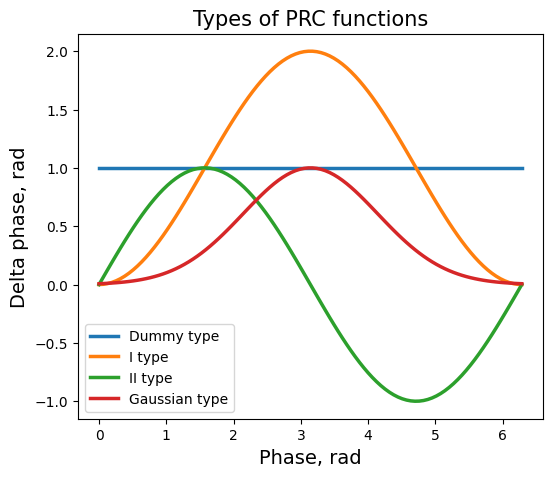

In [22]:
t = np.linspace(0, 2*np.pi, 100)
x = prc_dummy(1, t)
x1 = prc_type_I(1, t)
x2 = prc_type_II(1, t)
x3 = prc_gaussian(1, t)

fig, ax = plt.subplots(1,1, figsize=(6, 5))
line_wid = 2.5
plt.plot(t, x, label='Dummy type', lw=line_wid)
plt.plot(t, x1, label='I type', lw=line_wid)
plt.plot(t, x2, label='II type', lw=line_wid)
plt.plot(t, x3, label='Gaussian type', lw=line_wid)
plt.title('Types of PRC functions', fontsize=15)
plt.xlabel('Phase, rad',fontsize=14)
plt.ylabel('Delta phase, rad', fontsize=14)
plt.legend()
plt.savefig('images_draft/prc_supplement.pdf', format='pdf')
plt.show()

### Natural freqs.

In [2]:
import numpy as np
from tqdm.notebook import tqdm
from neurokuramoto.utils import (
    DPI,
    units2sec,
    generate_w0_with_locus
    )
from data.configs.env0 import params_dict_train
import matplotlib.pyplot as plt
from data.configs.env0 import (
    n_neurons, grid_size, coord_modif,
    eval_envs_list, checking
)

# 1. Init model for DBS OFF
eval_d = eval_envs_list[0]
w0_s = []
np.random.seed(10)
for i in range(5):
    (w0_eval, ncoords, ngrid,
        w0_temp_eval, w_locus_eval, lmask_eval) = generate_w0_with_locus(
                n_neurons, grid_size,
                coord_modif,
                locus_center=eval_d['locus_center'],
                locus_size=eval_d['locus_size'],
                wmuL=17, wsdL=1, 
                show=False, vertical_layer=4)

    w0_s.append([w0_eval, ncoords, ngrid,
        w0_temp_eval, w_locus_eval, lmask_eval])

In [12]:
mean_w0, _, _, _, _, _ = generate_w0_with_locus(
                1728, [12, 12, 12],
                coord_modif,
                locus_center=eval_d['locus_center'],
                locus_size=eval_d['locus_size'],
                wmuL=17, wsdL=1, 
                show=False, vertical_layer=4)

In [6]:
w0_eval = w0_s[0][0]
print(w0_eval.shape)

(512,)


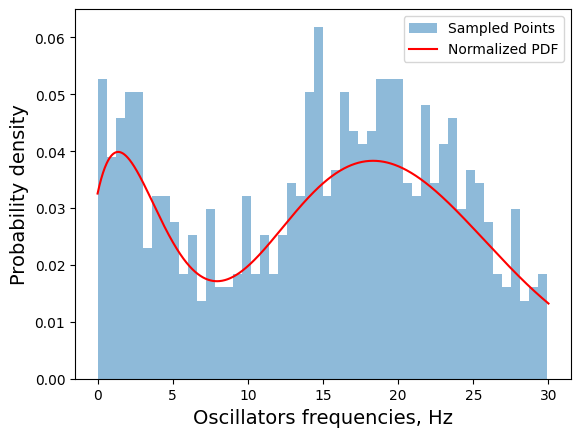

In [ ]:
# Sample from new distributiion
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

# Given data points
lf_peak = 6
beta_peak = 9
y = [6, 7.7, lf_peak, 7.7, 4, 3.5, 4, 5, 5.7, beta_peak, 5.7, 4.9, 2.3, 1.2, 0.8, 0.75, 0.7, 0.7, 0.68]
x = [0, 1.8, 2.5, 3.3, 4.5, 5.5, 8, 12.5, 18, 20, 22, 25, 30, 35, 40, 45, 50, 55, 60]

# Fit a polynomial to the data points
degree = 10  # Degree of the polynomial, adjust as needed
coeffs = np.polyfit(x, y, degree)
poly = np.poly1d(coeffs)

x_range = np.linspace(np.min(x), 30, 1000)
y_poly = poly(x_range)

# Normalize the polynomial to make it a valid PDF
def pdf(x):
    return np.maximum(poly(x), 0)  # Ensure non-negative values

normalization_constant, _ = quad(pdf, np.min(x), np.max(x))
pdf_normalized = lambda x: pdf(x) / normalization_constant

N = 729
cdf_values = np.cumsum(pdf_normalized(x_range))
cdf_values /= cdf_values[-1]  # Normalize CDF to range from 0 to 1

# Create an interpolating function for the inverse CDF
inverse_cdf = interp1d(cdf_values, x_range, bounds_error=False, fill_value=(x_range[0], x_range[-1]))

# Sample points
np.random.seed(40)
random_values = np.random.rand(N)
samples = inverse_cdf(random_values)

# Plot the histogram of the sampled points
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Sampled Points')
plt.plot(x_range, pdf_normalized(x_range),
         label='Normalized PDF', color='red')

# plt.axvline()
# plt.axvline()

plt.xlabel('Oscillators frequencies, Hz', fontsize=14)
plt.ylabel('Probability density', fontsize=14)
plt.legend()
# plt.savefig()
plt.show()

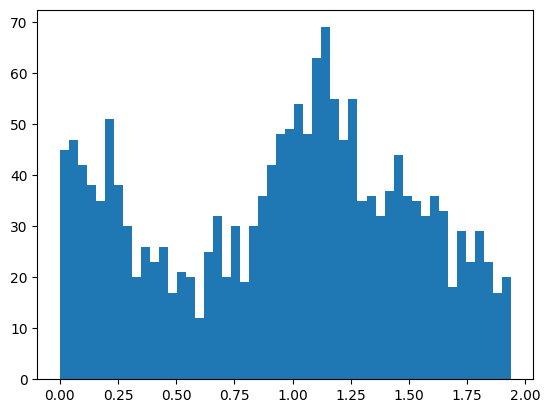

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

plt.hist(mean_w0, bins=50)
plt.title('', fontsize=15)
plt.show()


# Run perturbation stability test for Figure 3

In [ ]:
import os 
import numpy as np
import torch
import shutil
from copy import deepcopy
from environment.utils import (
    generate_w0_with_locus,
    band_pass_envelope
    )
# We import env version 
from environment.env_configs.env2 import (
    n_neurons, grid_size, coord_modif,
    eval_envs_list
)
from scipy.signal import filtfilt
from environment.env import SpatialKuramoto
from stable_baselines3 import PPO, SAC, DDPG
from aDBS_RL.agents.IQL.agent import IQL
from aDBS_RL.agents.simple_dbs import RandomDBS, HFDBS
from aDBS_RL.evaluate_HF_DBS import evaluate_policy_
np.random.seed(228)

In [ ]:
def make_env(d):
    """
    Creates environment for eval
    """
    env = SpatialKuramoto(params_dict=d)
    return env
    
    
def init_envs(NUMBER_OF_ENV, name_log_dir='eval_env2'):
    # 1. Instantiate environments for evaluation
    eval_envs_list_new = []
    for n_env in range(NUMBER_OF_ENV):
        eval_d = eval_envs_list[n_env]

        (w0_eval, ncoords, ngrid,
            w0_temp_eval, w_locus_eval, lmask_eval) = generate_w0_with_locus(
                    n_neurons, grid_size,
                    coord_modif,
                    locus_center=eval_d['locus_center'],
                    locus_size=eval_d['locus_size'],
                    wmuL=17, wsdL=1, 
                    show=False, vertical_layer=4)
        
        eval_d['reward_func'] = 'bbpow_action'
        eval_d['neur_coords'] = ncoords
        eval_d['neur_grid'] = ngrid

        eval_d['w0'] = w0_eval
        eval_d['w0_without_locus'] = w0_temp_eval
        eval_d['locus_without_w0'] = w_locus_eval
        eval_d['locus_mask'] = lmask_eval

        eval_d['total_episode_len'] = 1500   # TMP!!!!!!

        eval_d['spatial_feature'] = False
        eval_d['dbs_action_bounds'] = [-5, 5]    # NOTE: IMPORTANT!!!

        ################## Define temporal features
        eval_d['save_events'] = True

        # 2. We make savings of temporal events files
        # with uniques name for each env
        lpath = f'data/{FOLDER_NAME}/{name_log_dir}_{n_env}'
        eval_d['log_path'] = lpath

        if os.path.exists(lpath): 
            shutil.rmtree(lpath)
            print('Folder existed. Deleted it!', '--'*40)

        os.makedirs(lpath, exist_ok=True)
        print('Created directory: ', lpath)
        
        eval_d['temporal_drift'] = True
        eval_d['random_freq_update'] = False

        # TMP TMP TMP TMP TMP TMP TMP NOTE TMP TMP TMP TMP 
        eval_d['electrode_drift_freq'] = 7

        eval_d['plasticity_drift_freq'] = 1    # TMP!!!!!!!!
        eval_d['plasticity_percent'] = 1.5   # [%]
        eval_d['reset_plasticity_episode'] = 10

        eval_d['encapsulation_drift_freq'] = 5
        eval_d['encapsulation_percent'] = 0.05  # 7, 4    # [%]

        eval_d['mov_modulation_drift_freq'] = 3

        eval_envs_list_new.append(make_env(eval_d))
        
    return eval_envs_list_new

#######################################################################
# FOLDER_NAME = 'perturbation_exp/new_hf_dbs_test'
# save_runs_name = 'data/perturbation_exp/new_hf_dbs_test.npy'
# FOLDER_NAME = 'perturbation_exp_hf_DBS'
# save_runs_name = 'data/fig3_perturn_env_run_HF_DBS.npy'

FOLDER_NAME = 'perturbation_exp/iql_r2'
save_runs_name = 'data/perturbation_exp/iql_r2.npy'

# model_name = 'data/validation_results/env2_R3_ddpg_VER2/saved_models/env2_R3_ddpg_VER2_2400000_steps.zip'
# agent = 'HF-DBS'
# model_name = 'data/validation_results/env2_R1_sac_VER2/saved_models/env2_R1_sac_VER2_2400000_steps.zip'
# model_name = 'data/validation_results/env2_R3_ddpg_VER2/saved_models/env2_R3_ddpg_VER2_2400000_steps.zip'
model_name = 'data/validation_results/env2_R2_ppo_VER2_CONT/_CONTINUE_TRAIN/saved_models/env2_R2_ppo_VER2_CONT_2400000_steps.zip'
agent = 'IQL'
print('AGENT: ', agent)
print('^'*30)
#######################################################################
### Set parameters for validation 
NUMBER_OF_ENV = 5
each_env_run_episodes = 21
##################################

# 2. Init envs for evaluation 
envs_cpu = init_envs(NUMBER_OF_ENV=NUMBER_OF_ENV)

# 4. Run evaluation for all envs (handmade)
def calc_psd(sig_envs, psd_dt, cut_idx=1500, log_scale=True,
            beta_a=12.5, beta_b=21):
    sig = sig_envs
    sig_filt, _ = band_pass_envelope(sig, 1/psd_dt, order=2)
    ft = np.abs(np.fft.rfft(sig_filt)/sig_filt.shape[0])**2 * 2
    freq = np.fft.rfftfreq(sig_filt.shape[0], psd_dt)
    ft = filtfilt([1,1,1,1,1,1,1,1,1,1,1,1,], 5, ft)
    # Also calculate beta band power
    idx = np.where((freq > beta_a) & (freq < beta_b))
    res = np.sum(ft[idx])
    return res

def rescale_action(action):
    x, y = [-1, 1] # original_range
    z, k = [-5, 5]  # target_range
    new_action = z + ((k - z) * (action - x)) / (y - x)
    return new_action


def eval_for_fig3(model, envs_cpu):
    bbpow_list = []   # shape: [env x episodes]
    energy_list = []    # shape: [env x episodes]
    for env in envs_cpu:

        per_episode_bbpow = []
        per_episode_energy = []
        episode_rewards, true_lfp, actions_list = evaluate_policy_(
                    model, env, n_envs=1, n_eval_episodes=each_env_run_episodes,
                    render=False, deterministic=True, return_episode_rewards=True,
                    warn=False, callback=None,)
        print('actions_list ', actions_list)

        true_lfp = true_lfp[0]
        action_episode_len = int(len(actions_list) / each_env_run_episodes)
        print('action_episode_len: ', action_episode_len)
        lft_episode_len = int(len(true_lfp) / each_env_run_episodes)

        # Extract values per episode
        s, e = 0, lft_episode_len
        s2, e2 = 0, action_episode_len
        for r in range(each_env_run_episodes):

            # Beta band power
            lfp_per_episode = true_lfp[s:e]
            bbpow = calc_psd(lfp_per_episode, psd_dt=0.0005)  # NOTE: hardcode dt
            per_episode_bbpow.append(bbpow)
            s = deepcopy(e)
            e += lft_episode_len

            # Actions energy
            e_per_episode = actions_list[s2:e2]
            u_energy = np.sum(np.abs(e_per_episode), axis=0)
            s2 = deepcopy(e2)
            e2 += action_episode_len
            per_episode_energy.append(u_energy[0])

        bbpow_list.append(per_episode_bbpow)
        energy_list.append(per_episode_energy)

    bbpow_list = np.asarray(bbpow_list)
    energy_list = np.asarray(energy_list)
    return bbpow_list, energy_list, action_episode_len

# 3. Load model
if agent == 'PPO':
    model = PPO.load(model_name)
elif agent == 'SAC':
    model = SAC.load(model_name)
elif agent == 'DDPG':
    model = DDPG.load(model_name)
elif agent == 'HF-DBS':
    model = HFDBS(action=1)
elif agent == 'Random':
    model = RandomDBS(action_magnitude=1.)
elif agent == 'IQL':
    device = 'cuda'
    model = IQL(state_size=envs_cpu[0].observation_space.shape[1],
            action_size=envs_cpu[0].action_space.shape[0],
            learning_rate=3e-4,
            hidden_size=256,
            tau=5e-3,
            temperature=1,
            expectile=0.7,
            device=device
            )
    model.actor_local.load_state_dict(torch.load(
        # '_kenarius_online_R3_bbpow_Ep300.pth', 
        # '_kenarius_online_R3_thr_Ep300.pth',
        '_kenarius_online_R2_tmp_Ep300.pth',
                    map_location=torch.device(device)))
    
# Run validation for our model
bbpow, energy, a_len = eval_for_fig3(model, envs_cpu)   # TMP uncomment and debug

# Rescale energy between [-5, 5]
energy_rescaled = [rescale_action(e) for e in energy]

# 4. Run in parallel the same env without DBS, for reference
# NOTE: init their own envs for hf-dbs 
envs_hf_dbs = init_envs(NUMBER_OF_ENV, name_log_dir='eval_env2_hf_dbs')

nodbs_model = HFDBS(action=0.)   # noDBS model
bbpow_NODBS, energy_NODBS, _ = eval_for_fig3(nodbs_model, envs_hf_dbs)

# Save all runs
d = {'bbpow': bbpow,
     'energy_rescaled': energy_rescaled,
     'a_len': a_len,
     'bbpow_NODBS': bbpow_NODBS}
np.save(save_runs_name, d)

# Take 0th eval env for logging and load highest file idx
lpath = 'data/perturbation_experiment/eval_env2_0'
# f"temp_{reset_count}.npy"

temporal_logs_dirs = os.listdir(lpath)
print('temporal_logs_dirs ', temporal_logs_dirs)

max_file = max(temporal_logs_dirs, key=lambda x: int(x[5:-4]))
print('max_file: ', max_file)